# Question 1

In [55]:
# libraries
import numpy as np
import pandas as pd
import random
import seaborn as sns
sns.set(style="ticks", color_codes=True)
from sklearn import neighbors
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

In [56]:
#Columns/Features
D = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol']
L = 'quality'
C = 'color'
DL = D + [L]
DC = D + [C]
DLC = DL + [C]

#Loading Data set
wine_r = pd.read_csv("winequality-red.csv", sep=';')
#Loading Data set
wine_w = pd.read_csv("winequality-white.csv", sep=';')
wine_w= wine_w.copy()
wine_w[C]= np.zeros(wine_w.shape[0])
wine_r[C]= np.ones(wine_r.shape[0])
wine = pd.concat([wine_w,wine_r])

In [57]:
print(wine.shape)
wine[D].describe()
wine[D].head()

(6497, 13)


fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.0              0.27         0.36            20.7      0.045   
1            6.3              0.30         0.34             1.6      0.049   
2            8.1              0.28         0.40             6.9      0.050   
3            7.2              0.23         0.32             8.5      0.058   
4            7.2              0.23         0.32             8.5      0.058   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 45.0                 170.0   1.0010  3.00       0.45   
1                 14.0                 132.0   0.9940  3.30       0.49   
2                 30.0                  97.0   0.9951  3.26       0.44   
3                 47.0                 186.0   0.9956  3.19       0.40   
4                 47.0                 186.0   0.9956  3.19       0.40   

   alcohol  
0      8.8  
1      9.5  
2     10.1  
3      9.9  
4      9.9

In [58]:
print(wine.shape)
wine[DLC].describe()
wine[DLC].head()

(6497, 13)


fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.0              0.27         0.36            20.7      0.045   
1            6.3              0.30         0.34             1.6      0.049   
2            8.1              0.28         0.40             6.9      0.050   
3            7.2              0.23         0.32             8.5      0.058   
4            7.2              0.23         0.32             8.5      0.058   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 45.0                 170.0   1.0010  3.00       0.45   
1                 14.0                 132.0   0.9940  3.30       0.49   
2                 30.0                  97.0   0.9951  3.26       0.44   
3                 47.0                 186.0   0.9956  3.19       0.40   
4                 47.0                 186.0   0.9956  3.19       0.40   

   alcohol  quality  color  
0      8.8        6    0.0  
1      9.5        6    0.0  
2     10.1        6    0.0  
3      9.9        6    0.0  
4      9.9        6    0.0

## Normalization

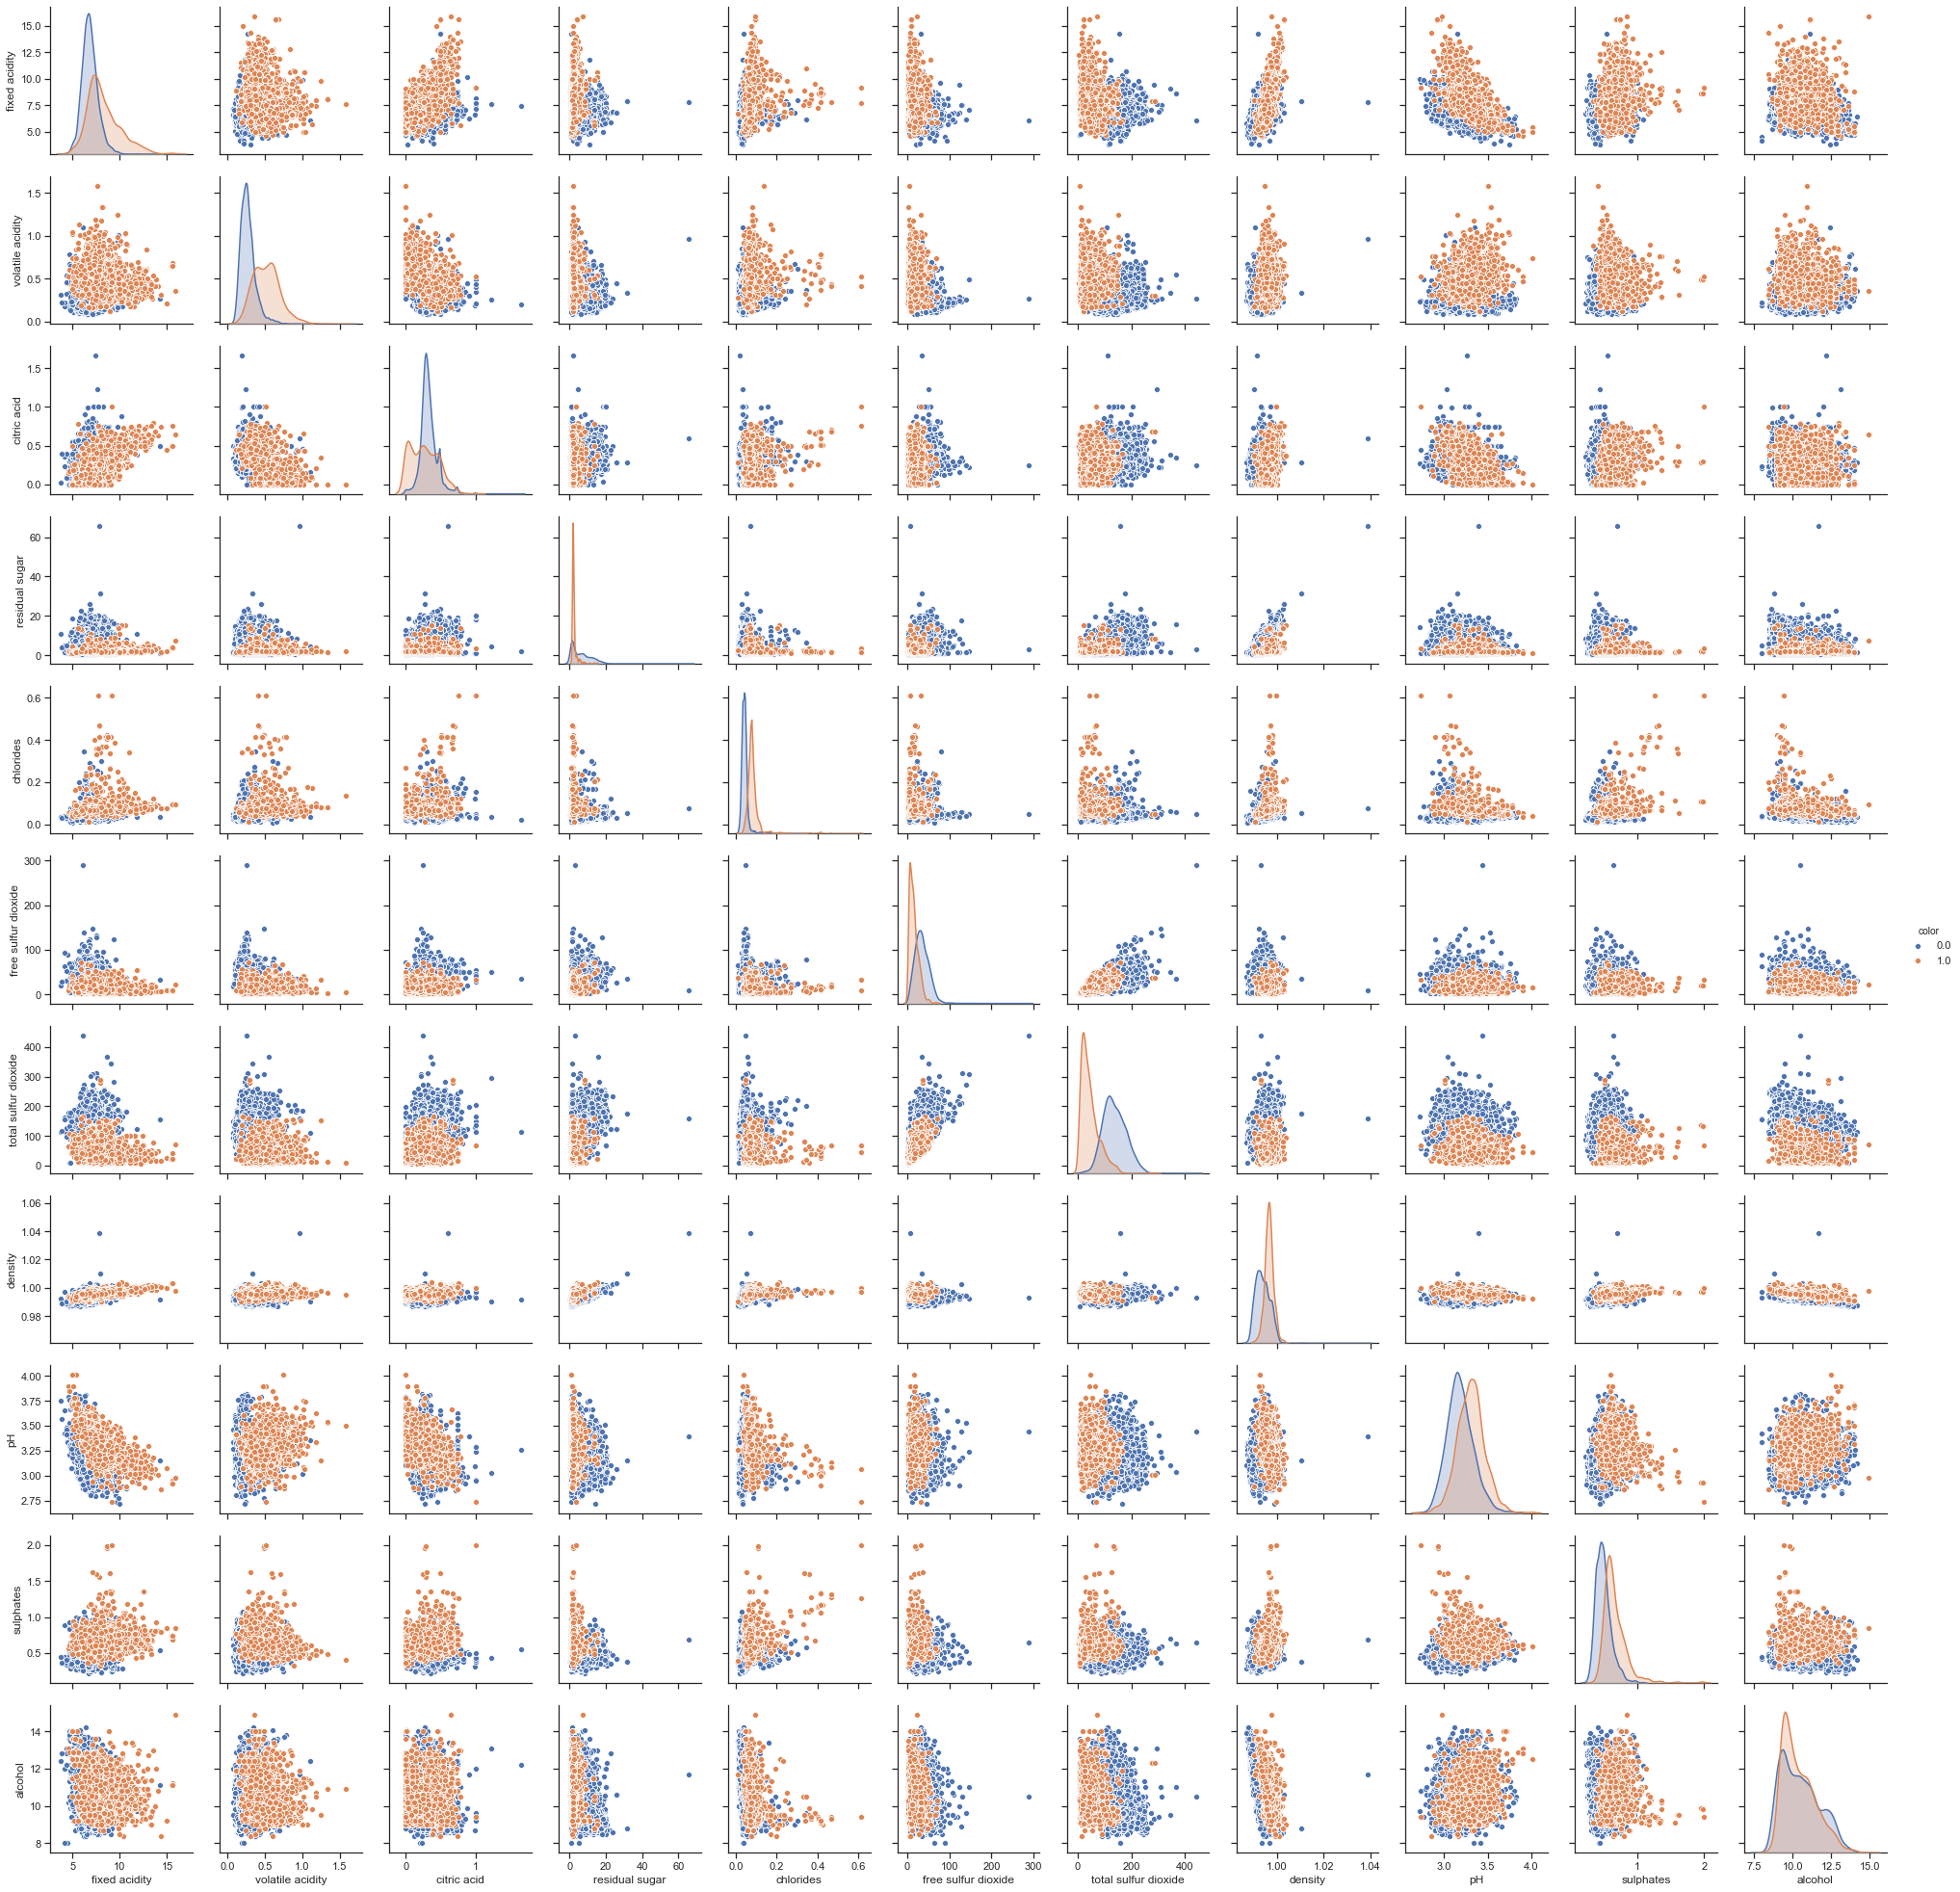

In [59]:
# none normalization pairplot - label color
sns.pairplot(wine[DC],hue="color", vars=D)

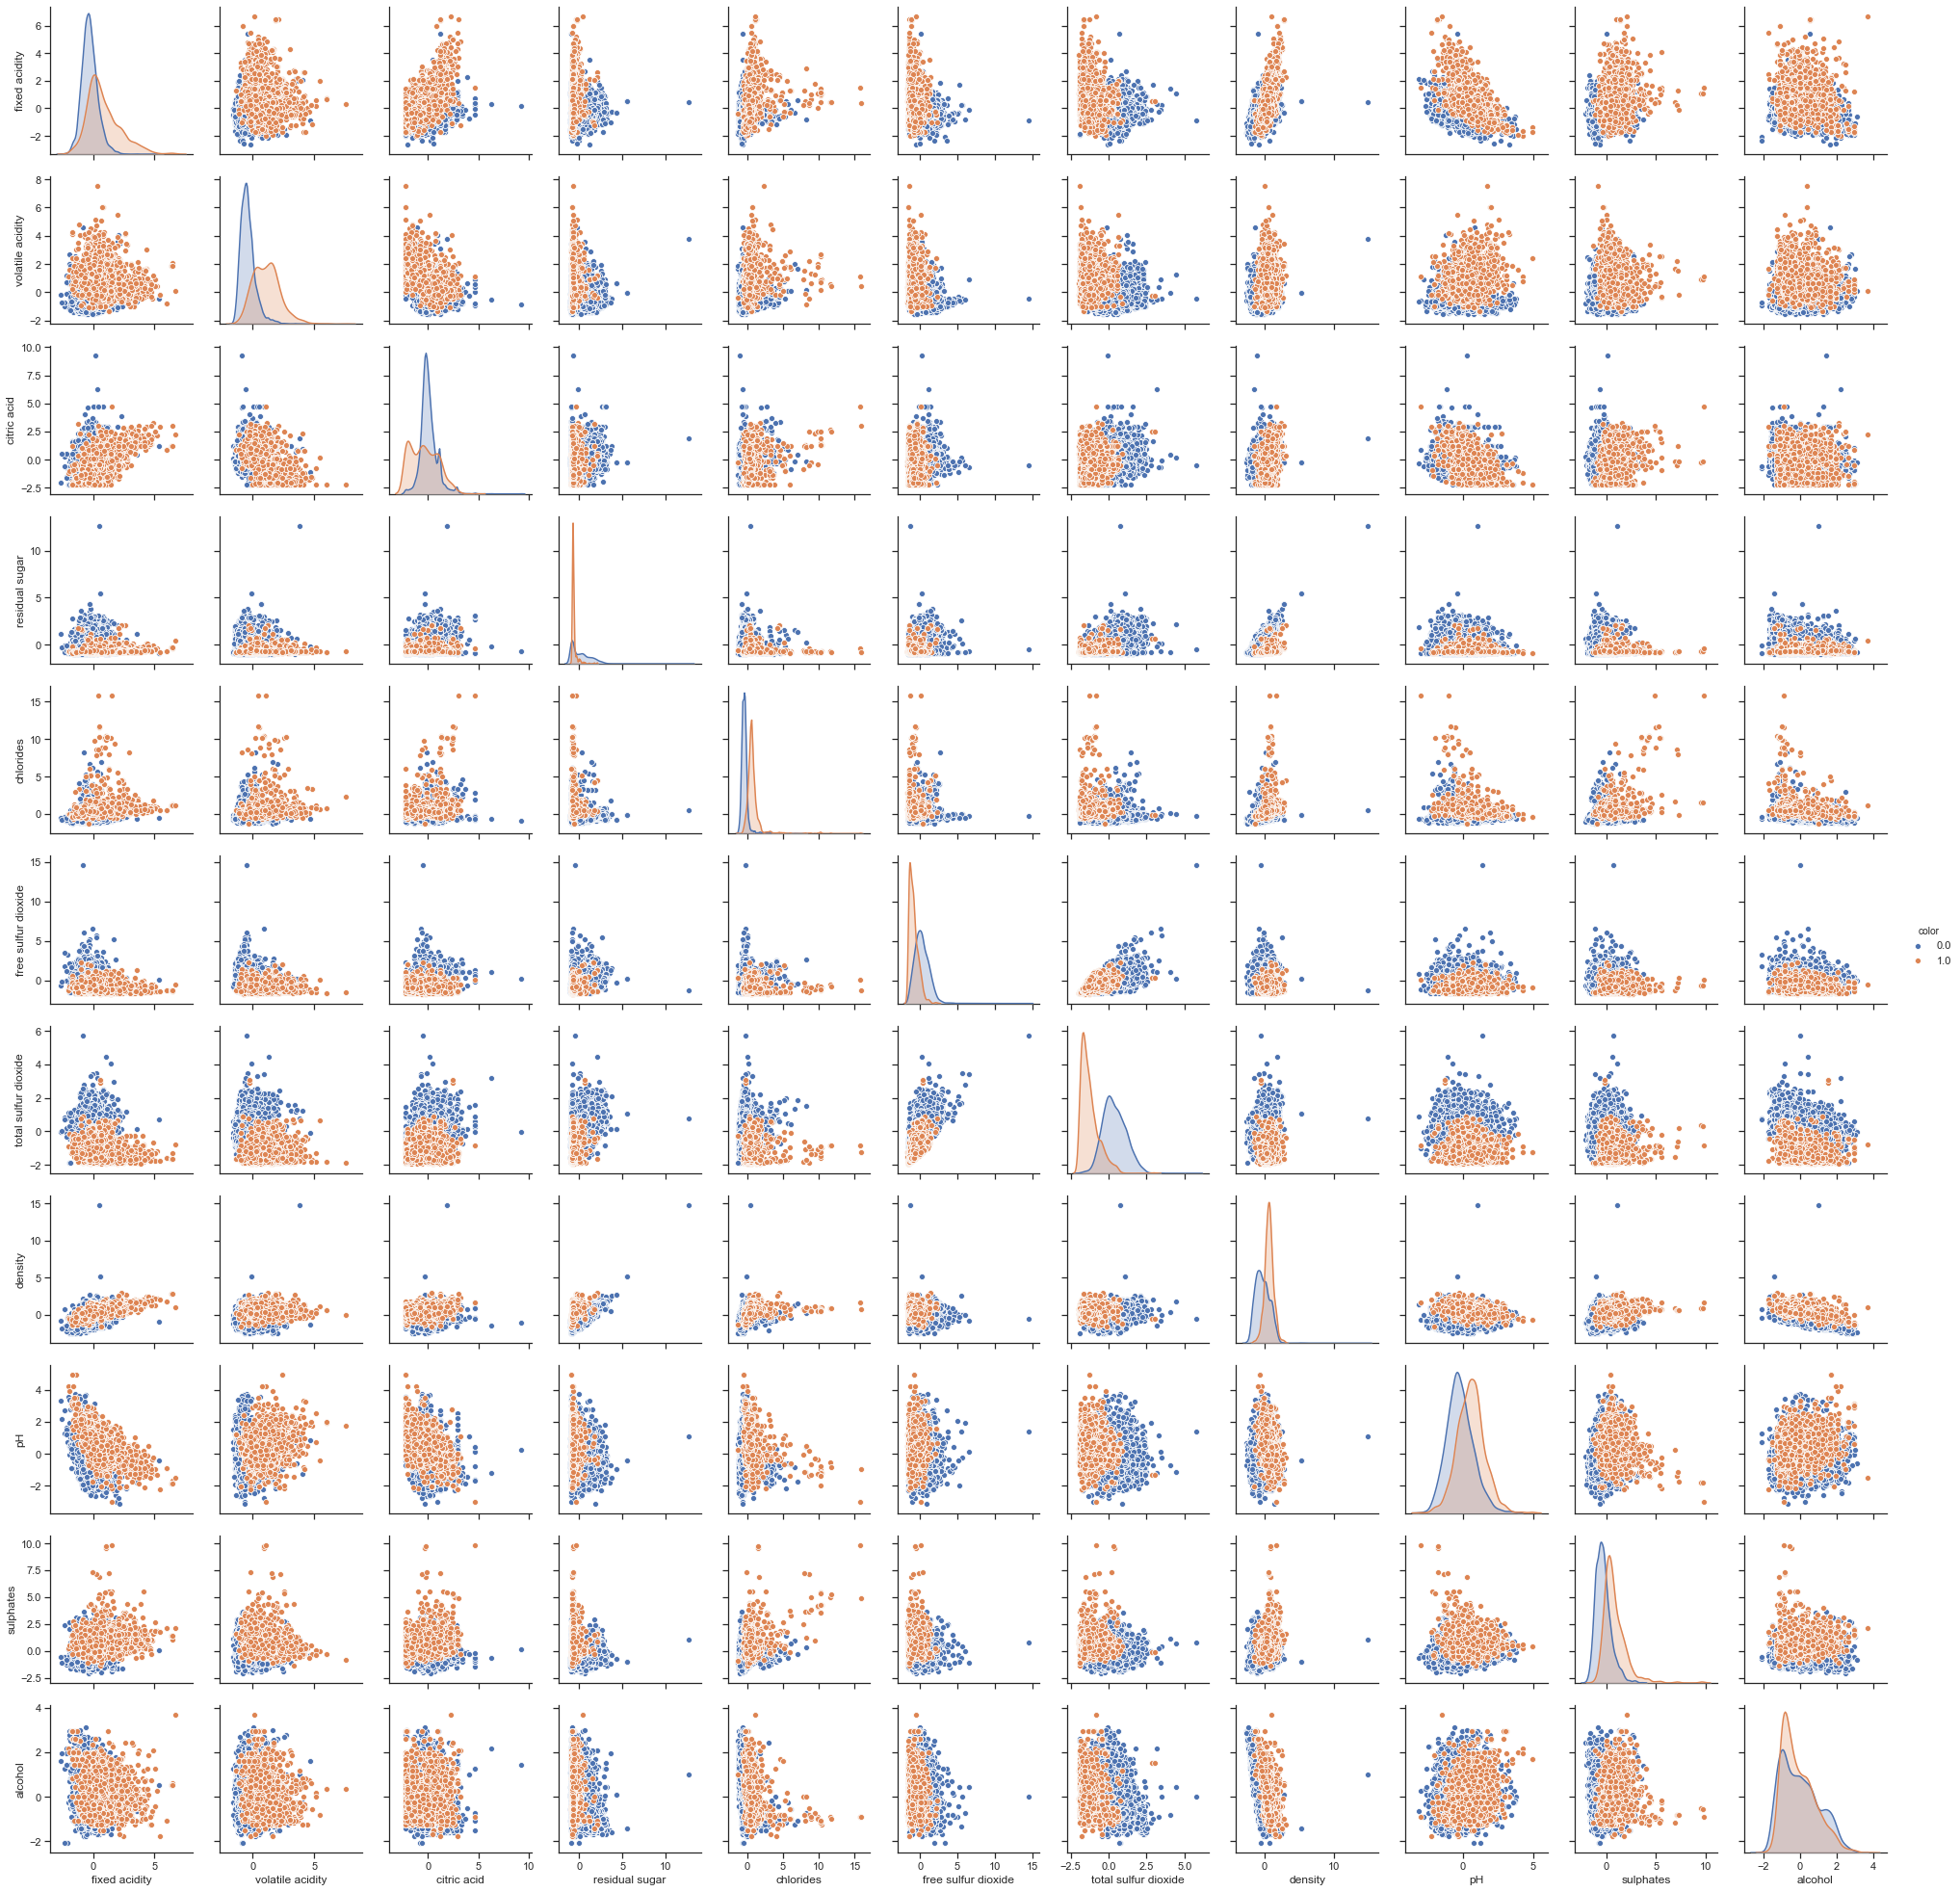

In [60]:
#Z-Score normalization pairplot - label color
from sklearn import preprocessing

scaler_1 = preprocessing.StandardScaler().fit(wine[D].values)
scaler_1
wine_n = scaler_1.transform(wine[D].values)
wine_nd= pd.DataFrame(wine_n, columns = D)
wine_nd['color']= np.ravel(wine[[C]])
wine_nd['quality']= np.ravel(wine[[L]])
sns.pairplot(wine_nd,hue="color", vars=D)

According to two pair plots above, the distributions remain the same, and the relation between data points is also kept the same. But in every single plot, values of all data points after Z-score normalization are clustering around zero and have variation of 1. Values of different feature now all fall into in simialr small interval without unit limitaion.

## Train/Test Data Split

In [173]:
#with label color
X = wine_n
y = np.ravel(wine[[C]])
ran = 42
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = ran) 

#with label quality
M = wine_n
n = np.ravel(wine[[L]])
ran = 42
M_train, M_test, n_train, n_test = train_test_split(M, n, test_size=0.2, random_state = ran) 

## Classification 

In [174]:
# classify color of wine with all features

n_neighborslist = list(range(1,60))
col_names=['uniform', 'manhattan distance','euclidean distance']
accarray = np.zeros((len(n_neighborslist),3))

#add multiple plots to same chart, one for each weighting approach
acc_ca=pd.DataFrame(accarray, columns=col_names)

for k in n_neighborslist:
    neigh = neighbors.KNeighborsClassifier(n_neighbors=k, weights='uniform')
    neigh.fit(X_train, y_train)
    y_pred = neigh.predict(X_test)
    accscore = accuracy_score(y_test, y_pred)
    acc_ca.at[k,col_names[0]] = accscore
    
for k in n_neighborslist:
    neigh_2 = neighbors.KNeighborsClassifier(n_neighbors=k, weights='distance', p=1)
    neigh_2.fit(X_train, y_train)
    y_pred = neigh_2.predict(X_test)
    accscore = accuracy_score(y_test, y_pred)
    acc_ca.at[k,col_names[1]] = accscore

for k in n_neighborslist:
    neigh_3 = neighbors.KNeighborsClassifier(n_neighbors=k, weights='distance', p=2)
    neigh_3.fit(X_train, y_train)
    y_pred = neigh_3.predict(X_test)
    accscore = accuracy_score(y_test, y_pred)
    acc_ca.at[k,col_names[2]] = accscore
    
acc_ca.describe()

uniform  manhattan distance  euclidean distance
count  60.000000           60.000000           60.000000
mean    0.974000            0.978462            0.975064
std     0.127881            0.128465            0.128022
min     0.000000            0.000000            0.000000
25%     0.989231            0.993846            0.990000
50%     0.990000            0.995385            0.991538
75%     0.990769            0.996154            0.992308
max     0.994615            0.996923            0.995385

Text(0, 0.5, 'classification accuracy')

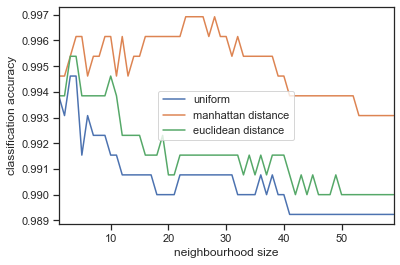

In [226]:
acc_ca[1:].plot.line()
plt.xlabel('neighbourhood size')
plt.ylabel('classification accuracy')

In [176]:
# classify quality of wine with all features

n_neighborslist = list(range(1,60))
col_names=['uniform', 'manhattan distance','euclidean distance']
accarray = np.zeros((len(n_neighborslist),3))

#add multiple plots to same chart, one for each weighting approach
acc_qa=pd.DataFrame(accarray, columns=col_names)

for k in n_neighborslist:
    neigh = neighbors.KNeighborsClassifier(n_neighbors=k, weights='uniform')
    neigh.fit(M_train, n_train)
    n_pred = neigh.predict(M_test)
    accscore = accuracy_score(n_test, n_pred)
    acc_qa.at[k,col_names[0]] = accscore
    
for k in n_neighborslist:
    neigh_2 = neighbors.KNeighborsClassifier(n_neighbors=k, weights='distance', p=1)
    neigh_2.fit(M_train, n_train)
    n_pred = neigh_2.predict(M_test)
    accscore = accuracy_score(n_test, n_pred)
    acc_qa.at[k,col_names[1]] = accscore

for k in n_neighborslist:
    neigh_3 = neighbors.KNeighborsClassifier(n_neighbors=k, weights='distance', p=2)
    neigh_3.fit(M_train, n_train)
    n_pred = neigh_3.predict(M_test)
    accscore = accuracy_score(n_test, n_pred)
    acc_qa.at[k,col_names[2]] = accscore
    
acc_qa.describe()

uniform  manhattan distance  euclidean distance
count  60.000000           60.000000           60.000000
mean    0.552000            0.672577            0.668410
std     0.073509            0.089133            0.088443
min     0.000000            0.000000            0.000000
25%     0.553846            0.683077            0.676923
50%     0.558462            0.688462            0.683077
75%     0.566923            0.690192            0.685385
max     0.630000            0.695385            0.690000

Text(0, 0.5, 'classification accuracy')

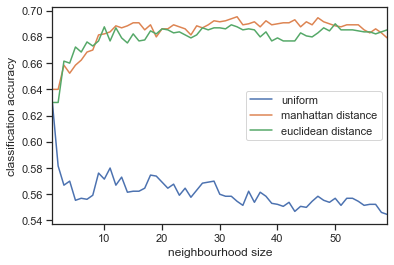

In [221]:
acc_qa[1:].plot.line()
plt.xlabel('neighbourhood size')
plt.ylabel('classification accuracy')

From knn classification results with label color and quality above, it is easily to conduct that the manhattan distance is the best weighting scheme among three weighting schemes.It leads to higher accuracy in different neighbourhood size.

## Feature Selection

For feature selection, I chose to use Correlation matrix analysis as a filter approach. Firstly, list features that has a Pearson's coefficient with label color greater than 0.4.

In [178]:
corr= wine_nd.corr() 
corr_y = abs(corr["color"]) 
highest_corr = corr_y[corr_y >0.4] 
highest_corr.sort_values(ascending=True)

free sulfur dioxide     0.471644
fixed acidity           0.486740
sulphates               0.487218
chlorides               0.512678
volatile acidity        0.653036
total sulfur dioxide    0.700357
color                   1.000000
Name: color, dtype: float64

Now from the correlatioin coefficients list above, I chose four features that have highest correlation with label color. Then I used a correlation matrix to see if those four features are correlated to each other that might influence the accuracy.

(4, -0.5)

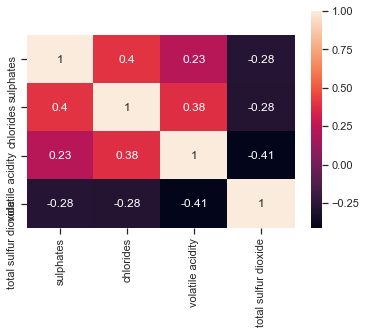

In [219]:
S=['sulphates' , 'chlorides' , 'volatile acidity' , 'total sulfur dioxide']
corr2 = wine_nd[S].corr() 
sns.heatmap(corr2, annot=True, fmt=".2g").set_ylim(4,-0.5)

From the matrix, the correlation coefficient between those features are all less than or equal to 0.4. 
So they are not highly correlated to each other, and the selected features for label color are sulphates, chlorides, volatile acidity and total sulfur dioxide.

In [181]:
#selected subset features with label color
X = wine_nd[S].values
y = np.ravel(wine[[C]])
ran = 42
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = ran) 

n_neighborslist = list(range(1,60))
col_names=['uniform', 'manhattan distance','euclidean distance']
accarray = np.zeros((len(n_neighborslist),3))


acc_sc=pd.DataFrame(accarray, columns=col_names)

for k in n_neighborslist:
    neigh = neighbors.KNeighborsClassifier(n_neighbors=k, weights='uniform')
    neigh.fit(X_train, y_train)
    y_pred = neigh.predict(X_test)
    accscore = accuracy_score(y_test, y_pred)
    acc_sc.at[k,col_names[0]] = accscore
    
for k in n_neighborslist:
    neigh_2 = neighbors.KNeighborsClassifier(n_neighbors=k, weights='distance', p=1)
    neigh_2.fit(X_train, y_train)
    y_pred = neigh_2.predict(X_test)
    accscore = accuracy_score(y_test, y_pred)
    acc_sc.at[k,col_names[1]] = accscore

for k in n_neighborslist:
    neigh_3 = neighbors.KNeighborsClassifier(n_neighbors=k, weights='distance', p=2)
    neigh_3.fit(X_train, y_train)
    y_pred = neigh_3.predict(X_test)
    accscore = accuracy_score(y_test, y_pred)
    acc_sc.at[k,col_names[2]] = accscore
    
acc_sc.describe()

uniform  manhattan distance  euclidean distance
count  60.000000           60.000000           60.000000
mean    0.970577            0.971295            0.971987
std     0.127429            0.127522            0.127610
min     0.000000            0.000000            0.000000
25%     0.986154            0.986923            0.988462
50%     0.986923            0.987692            0.988462
75%     0.987692            0.987692            0.988462
max     0.990000            0.990769            0.990000

Text(0, 0.5, 'classification accuracy')

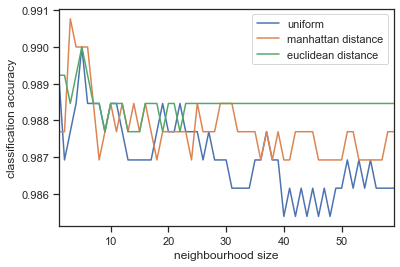

In [227]:
acc_sc[1:].plot.line()
plt.xlabel('neighbourhood size')
plt.ylabel('classification accuracy')

For selected features with label color, the highest accuracy has a little decrease of 0.006. Although it has a slightly decrease, this selected feature subset could help save computing time with a little accuracy decrease.

Now we use same method to select feature subset with label quality.

In [217]:
corr= wine_nd.corr() 
corr_y = abs(corr["quality"]) 
highest_corr = corr_y[corr_y >0.2] 
highest_corr.sort_values(ascending=True)

chlorides           0.200666
volatile acidity    0.265699
density             0.305858
alcohol             0.444319
quality             1.000000
Name: quality, dtype: float64

(4, -0.5)

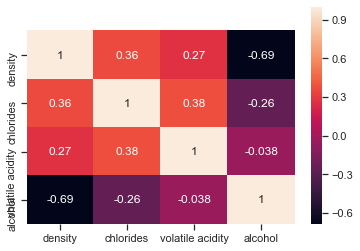

In [220]:
B=['density' , 'chlorides' , 'volatile acidity' , 'alcohol']
corr2 = wine_nd[B].corr() 
sns.heatmap(corr2, annot=True, fmt=".2g").set_ylim(4,-0.5)

From the matrix, the correlation coefficient between those features are mostly less than 0.4, so they are not highly correlated to each other.But the correlation coefficient between density and alcohol is -0.69, which means they are highly negatively correlated. But more features could lead to higher total accuracy so for here still choose density, chlorides, volatile acidity and alcohol as selected features for quality.

In [218]:
#selected subset features with label quality
B=['density' , 'chlorides' , 'volatile acidity' , 'alcohol']
X = wine_nd[B].values
y = np.ravel(wine[[L]])
ran = 42
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = ran) 

n_neighborslist = list(range(1,60))
col_names=['uniform', 'manhattan distance','euclidean distance']
accarray = np.zeros((len(n_neighborslist),3))


acc_sq=pd.DataFrame(accarray, columns=col_names)

for k in n_neighborslist:
    neigh = neighbors.KNeighborsClassifier(n_neighbors=k, weights='uniform')
    neigh.fit(X_train, y_train)
    y_pred = neigh.predict(X_test)
    accscore = accuracy_score(y_test, y_pred)
    acc_sq.at[k,col_names[0]] = accscore
    
for k in n_neighborslist:
    neigh_2 = neighbors.KNeighborsClassifier(n_neighbors=k, weights='distance', p=1)
    neigh_2.fit(X_train, y_train)
    y_pred = neigh_2.predict(X_test)
    accscore = accuracy_score(y_test, y_pred)
    acc_sq.at[k,col_names[1]] = accscore

for k in n_neighborslist:
    neigh_3 = neighbors.KNeighborsClassifier(n_neighbors=k, weights='distance', p=2)
    neigh_3.fit(X_train, y_train)
    y_pred = neigh_3.predict(X_test)
    accscore = accuracy_score(y_test, y_pred)
    acc_sq.at[k,col_names[2]] = accscore
    
acc_sq.describe()

uniform  manhattan distance  euclidean distance
count  60.000000           60.000000           60.000000
mean    0.539962            0.653462            0.649077
std     0.071587            0.088070            0.087574
min     0.000000            0.000000            0.000000
25%     0.543654            0.664423            0.657500
50%     0.551538            0.671154            0.666538
75%     0.554615            0.674808            0.671538
max     0.588462            0.681538            0.676923

Text(0, 0.5, 'classification accuracy')

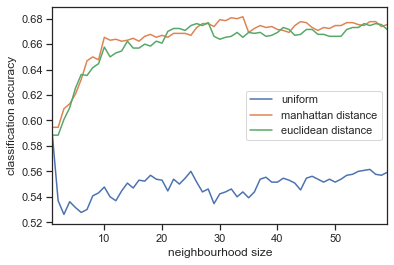

In [228]:
acc_sq[1:].plot.line()
plt.xlabel('neighbourhood size')
plt.ylabel('classification accuracy')

For selected features with label quality, the highest accuracy has a little decrease of 0.015 compared to all features model. This could be seen as a slightly decrease, this selected feature subset could help save computing time with a little accuracy decrease.

## Feature Extraction

**Z-score Normalization**

In [188]:
#PCA with label color
from sklearn.decomposition import PCA

X = wine_nd[D].values
y = np.ravel(wine[[C]])
ran = 42
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = ran) 

pca = PCA(n_components = 5)
pca.fit(X_train)
X_trainPca = pca.transform(X_train)
X_testPca = pca.transform(X_test)


n_neighborslist = list(range(1,60))
col_names=['uniform', 'manhattan distance','euclidean distance']
accarray = np.zeros((len(n_neighborslist),3))

acc_pc=pd.DataFrame(accarray, columns=col_names)

for k in n_neighborslist:
    neigh = neighbors.KNeighborsClassifier(n_neighbors=k, weights='uniform')
    neigh.fit(X_trainPca, y_train)
    y_pred = neigh.predict(X_testPca)
    accscore = accuracy_score(y_test, y_pred)
    acc_pc.at[k,col_names[0]] = accscore
    
for k in n_neighborslist:
    neigh_2 = neighbors.KNeighborsClassifier(n_neighbors=k, weights='distance', p=1)
    neigh_2.fit(X_trainPca, y_train)
    y_pred = neigh_2.predict(X_testPca)
    accscore = accuracy_score(y_test, y_pred)
    acc_pc.at[k,col_names[1]] = accscore

for k in n_neighborslist:
    neigh_3 = neighbors.KNeighborsClassifier(n_neighbors=k, weights='distance', p=2)
    neigh_3.fit(X_trainPca, y_train)
    y_pred = neigh_3.predict(X_testPca)
    accscore = accuracy_score(y_test, y_pred)
    acc_pc.at[k,col_names[2]] = accscore

acc_pc.describe()

uniform  manhattan distance  euclidean distance
count  60.000000           60.000000           60.000000
mean    0.970244            0.972269            0.972231
std     0.127392            0.127649            0.127645
min     0.000000            0.000000            0.000000
25%     0.985385            0.988462            0.988462
50%     0.986923            0.988462            0.988462
75%     0.987885            0.989231            0.989231
max     0.991538            0.990769            0.991538

Text(0, 0.5, 'classification accuracy')

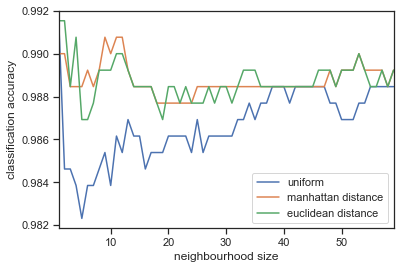

In [362]:
acc_pc[1:].plot.line()
plt.xlabel('neighbourhood size')
plt.ylabel('classification accuracy')

In [189]:
#LDA with label color
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

X = wine_nd[D].values
y = np.ravel(wine[[C]])
ran = 42
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = ran) 

lda = LinearDiscriminantAnalysis().fit(X_train,y_train) 
X_trainLda = lda.transform(X_train)
X_testLda = lda.transform(X_test) 


n_neighborslist = list(range(1,60))
col_names=['uniform', 'manhattan distance','euclidean distance']
accarray = np.zeros((len(n_neighborslist),3))

acc_lc=pd.DataFrame(accarray, columns=col_names)

for k in n_neighborslist:
    neigh = neighbors.KNeighborsClassifier(n_neighbors=k, weights='uniform')
    neigh.fit(X_trainLda, y_train)
    y_pred = neigh.predict(X_testLda)
    accscore = accuracy_score(y_test, y_pred)
    acc_lc.at[k,col_names[0]] = accscore
    
for k in n_neighborslist:
    neigh_2 = neighbors.KNeighborsClassifier(n_neighbors=k, weights='distance', p=1)
    neigh_2.fit(X_trainLda, y_train)
    y_pred = neigh_2.predict(X_testLda)
    accscore = accuracy_score(y_test, y_pred)
    acc_lc.at[k,col_names[1]] = accscore

for k in n_neighborslist:
    neigh_3 = neighbors.KNeighborsClassifier(n_neighbors=k, weights='distance', p=2)
    neigh_3.fit(X_trainLda, y_train)
    y_pred = neigh_3.predict(X_testLda)
    accscore = accuracy_score(y_test, y_pred)
    acc_lc.at[k,col_names[2]] = accscore

acc_lc.describe()    

uniform  manhattan distance  euclidean distance
count  60.000000           60.000000           60.000000
mean    0.977372            0.976154            0.976154
std     0.128318            0.128157            0.128157
min     0.000000            0.000000            0.000000
25%     0.993846            0.992308            0.992308
50%     0.993846            0.992692            0.992692
75%     0.993846            0.993077            0.993077
max     0.994615            0.993077            0.993077

Text(0, 0.5, 'classification accuracy')

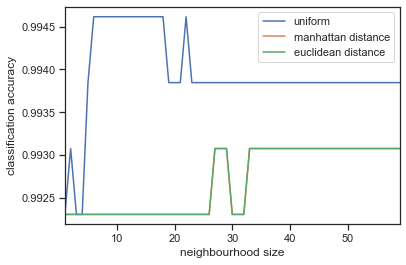

In [361]:
acc_lc[1:].plot.line()
plt.xlabel('neighbourhood size')
plt.ylabel('classification accuracy')

In [190]:
#PCA with label quality

from sklearn.decomposition import PCA

M = wine_n
n = np.ravel(wine[[L]])
ran = 42
M_train, M_test, n_train, n_test = train_test_split(M, n, test_size=0.2, random_state = ran) 

pca = PCA(n_components = 5)
pca.fit(M_train)
M_trainPca = pca.transform(M_train)
M_testPca = pca.transform(M_test)

n_neighborslist = list(range(1,60))
col_names=['uniform', 'manhattan distance','euclidean distance']
accarray = np.zeros((len(n_neighborslist),3))

acc_pq=pd.DataFrame(accarray, columns=col_names)

for k in n_neighborslist:
    neigh = neighbors.KNeighborsClassifier(n_neighbors=k, weights='uniform')
    neigh.fit(M_trainPca, n_train)
    n_pred = neigh.predict(M_testPca)
    accscore = accuracy_score(n_test, n_pred)
    acc_pq.at[k,col_names[0]] = accscore
    
for k in n_neighborslist:
    neigh_2 = neighbors.KNeighborsClassifier(n_neighbors=k, weights='distance', p=1)
    neigh_2.fit(M_trainPca, n_train)
    n_pred = neigh_2.predict(M_testPca)
    accscore = accuracy_score(n_test, n_pred)
    acc_pq.at[k,col_names[1]] = accscore

for k in n_neighborslist:
    neigh_3 = neighbors.KNeighborsClassifier(n_neighbors=k, weights='distance', p=2)
    neigh_3.fit(M_trainPca, n_train)
    n_pred = neigh_3.predict(M_testPca)
    accscore = accuracy_score(n_test, n_pred)
    acc_pq.at[k,col_names[2]] = accscore
    
acc_pq.describe()

uniform  manhattan distance  euclidean distance
count  60.000000           60.000000           60.000000
mean    0.517859            0.641590            0.642256
std     0.069833            0.084992            0.084678
min     0.000000            0.000000            0.000000
25%     0.519615            0.649231            0.649808
50%     0.523846            0.654615            0.654615
75%     0.527885            0.658654            0.657885
max     0.630769            0.666154            0.664615

Text(0, 0.5, 'classification accuracy')

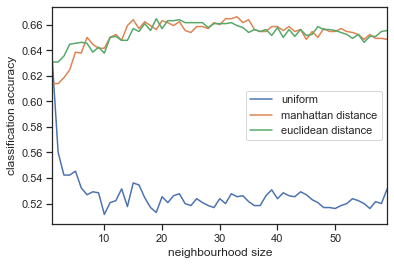

In [363]:
acc_pq[1:].plot.line()
plt.xlabel('neighbourhood size')
plt.ylabel('classification accuracy')

In [193]:
#LDA with label quality
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

M = wine_n
n = np.ravel(wine[[L]])
ran = 42
M_train, M_test, n_train, n_test = train_test_split(M, n, test_size=0.2, random_state = ran) 

lda = LinearDiscriminantAnalysis().fit(M_train,n_train) 
M_trainLda = lda.transform(M_train)
M_testLda = lda.transform(M_test) 


n_neighborslist = list(range(1,60))
col_names=['uniform', 'manhattan distance','euclidean distance']
accarray = np.zeros((len(n_neighborslist),3))

acc_lq=pd.DataFrame(accarray, columns=col_names)

for k in n_neighborslist:
    neigh = neighbors.KNeighborsClassifier(n_neighbors=k, weights='uniform')
    neigh.fit(M_trainLda, n_train)
    n_pred = neigh.predict(M_testLda)
    accscore = accuracy_score(n_test, n_pred)
    acc_lq.at[k,col_names[0]] = accscore
    
for k in n_neighborslist:
    neigh_2 = neighbors.KNeighborsClassifier(n_neighbors=k, weights='distance', p=1)
    neigh_2.fit(M_trainLda, n_train)
    n_pred = neigh_2.predict(M_testLda)
    accscore = accuracy_score(n_test, n_pred)
    acc_lq.at[k,col_names[1]] = accscore

for k in n_neighborslist:
    neigh_3 = neighbors.KNeighborsClassifier(n_neighbors=k, weights='distance', p=2)
    neigh_3.fit(M_trainLda, n_train)
    n_pred = neigh_3.predict(M_testLda)
    accscore = accuracy_score(n_test, n_pred)
    acc_lq.at[k,col_names[2]] = accscore
    
acc_lq.describe()

uniform  manhattan distance  euclidean distance
count  60.000000           60.000000           60.000000
mean    0.550590            0.662885            0.657859
std     0.073182            0.087785            0.086890
min     0.000000            0.000000            0.000000
25%     0.554423            0.670577            0.665385
50%     0.558462            0.676538            0.670000
75%     0.563077            0.681538            0.674615
max     0.636154            0.695385            0.685385

Text(0, 0.5, 'classification accuracy')

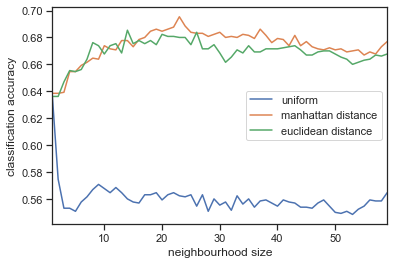

In [364]:
acc_lq[1:].plot.line()
plt.xlabel('neighbourhood size')
plt.ylabel('classification accuracy')

According to plots above, we can find that with both label color and quality, LDA has better performance than PCA. When modeling with label color, the uniform weighting scheme has the highest accuracy performance, and manhattan distance and euclidean distance have exactly same performance in any neighbourhood size,

When modeling with label quality, manhattane distance weighting scheme still has the best overall performance than the other two weighting schemes.

**None Normalization**

In [207]:
#PCA with label color
from sklearn.decomposition import PCA

X = wine[D].values
y = np.ravel(wine[[C]])
ran = 42
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = ran) 

pca = PCA(n_components = 5)
pca.fit(X_train)
X_trainPca = pca.transform(X_train)
X_testPca = pca.transform(X_test)


n_neighborslist = list(range(1,60))
col_names=['uniform', 'manhattan distance','euclidean distance']
accarray = np.zeros((len(n_neighborslist),3))

acc_pcn=pd.DataFrame(accarray, columns=col_names)

for k in n_neighborslist:
    neigh = neighbors.KNeighborsClassifier(n_neighbors=k, weights='uniform')
    neigh.fit(X_trainPca, y_train)
    y_pred = neigh.predict(X_testPca)
    accscore = accuracy_score(y_test, y_pred)
    acc_pcn.at[k,col_names[0]] = accscore
    
for k in n_neighborslist:
    neigh_2 = neighbors.KNeighborsClassifier(n_neighbors=k, weights='distance', p=1)
    neigh_2.fit(X_trainPca, y_train)
    y_pred = neigh_2.predict(X_testPca)
    accscore = accuracy_score(y_test, y_pred)
    acc_pcn.at[k,col_names[1]] = accscore

for k in n_neighborslist:
    neigh_3 = neighbors.KNeighborsClassifier(n_neighbors=k, weights='distance', p=2)
    neigh_3.fit(X_trainPca, y_train)
    y_pred = neigh_3.predict(X_testPca)
    accscore = accuracy_score(y_test, y_pred)
    acc_pcn.at[k,col_names[2]] = accscore

acc_pcn.describe()

uniform  manhattan distance  euclidean distance
count  60.000000           60.000000           60.000000
mean    0.910769            0.933179            0.926910
std     0.119654            0.122570            0.121739
min     0.000000            0.000000            0.000000
25%     0.923846            0.946154            0.940577
50%     0.924615            0.946923            0.940769
75%     0.927115            0.952308            0.944808
max     0.945385            0.956923            0.951538

Text(0, 0.5, 'classification accuracy')

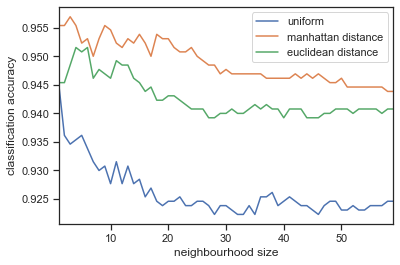

In [365]:
acc_pcn[1:].plot.line()
plt.xlabel('neighbourhood size')
plt.ylabel('classification accuracy')

In [209]:
#LDA with label color
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

X = wine[D].values
y = np.ravel(wine[[C]])
ran = 42
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = ran) 

lda = LinearDiscriminantAnalysis().fit(X_train,y_train) 
X_trainLda = lda.transform(X_train)
X_testLda = lda.transform(X_test) 


n_neighborslist = list(range(1,60))
col_names=['uniform', 'manhattan distance','euclidean distance']
accarray = np.zeros((len(n_neighborslist),3))

acc_lcn=pd.DataFrame(accarray, columns=col_names)

for k in n_neighborslist:
    neigh = neighbors.KNeighborsClassifier(n_neighbors=k, weights='uniform')
    neigh.fit(X_trainLda, y_train)
    y_pred = neigh.predict(X_testLda)
    accscore = accuracy_score(y_test, y_pred)
    acc_lcn.at[k,col_names[0]] = accscore
    
for k in n_neighborslist:
    neigh_2 = neighbors.KNeighborsClassifier(n_neighbors=k, weights='distance', p=1)
    neigh_2.fit(X_trainLda, y_train)
    y_pred = neigh_2.predict(X_testLda)
    accscore = accuracy_score(y_test, y_pred)
    acc_lcn.at[k,col_names[1]] = accscore

for k in n_neighborslist:
    neigh_3 = neighbors.KNeighborsClassifier(n_neighbors=k, weights='distance', p=2)
    neigh_3.fit(X_trainLda, y_train)
    y_pred = neigh_3.predict(X_testLda)
    accscore = accuracy_score(y_test, y_pred)
    acc_lcn.at[k,col_names[2]] = accscore

acc_lcn.describe() 

uniform  manhattan distance  euclidean distance
count  60.000000           60.000000           60.000000
mean    0.977372            0.976154            0.976154
std     0.128318            0.128157            0.128157
min     0.000000            0.000000            0.000000
25%     0.993846            0.992308            0.992308
50%     0.993846            0.992692            0.992692
75%     0.993846            0.993077            0.993077
max     0.994615            0.993077            0.993077

Text(0, 0.5, 'classification accuracy')

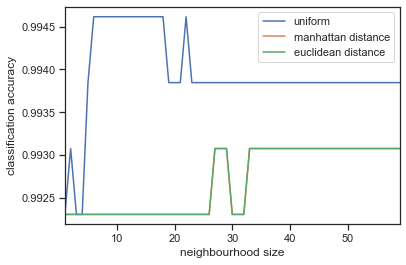

In [366]:
acc_lcn[1:].plot.line()
plt.xlabel('neighbourhood size')
plt.ylabel('classification accuracy')

In [210]:
#PCA with label quality

from sklearn.decomposition import PCA

M = wine[D].values
n = np.ravel(wine[[L]])
ran = 42
M_train, M_test, n_train, n_test = train_test_split(M, n, test_size=0.2, random_state = ran) 

pca = PCA(n_components = 5)
pca.fit(M_train)
M_trainPca = pca.transform(M_train)
M_testPca = pca.transform(M_test)

n_neighborslist = list(range(1,60))
col_names=['uniform', 'manhattan distance','euclidean distance']
accarray = np.zeros((len(n_neighborslist),3))

acc_pqn=pd.DataFrame(accarray, columns=col_names)

for k in n_neighborslist:
    neigh = neighbors.KNeighborsClassifier(n_neighbors=k, weights='uniform')
    neigh.fit(M_trainPca, n_train)
    n_pred = neigh.predict(M_testPca)
    accscore = accuracy_score(n_test, n_pred)
    acc_pqn.at[k,col_names[0]] = accscore
    
for k in n_neighborslist:
    neigh_2 = neighbors.KNeighborsClassifier(n_neighbors=k, weights='distance', p=1)
    neigh_2.fit(M_trainPca, n_train)
    n_pred = neigh_2.predict(M_testPca)
    accscore = accuracy_score(n_test, n_pred)
    acc_pqn.at[k,col_names[1]] = accscore

for k in n_neighborslist:
    neigh_3 = neighbors.KNeighborsClassifier(n_neighbors=k, weights='distance', p=2)
    neigh_3.fit(M_trainPca, n_train)
    n_pred = neigh_3.predict(M_testPca)
    accscore = accuracy_score(n_test, n_pred)
    acc_pqn.at[k,col_names[2]] = accscore
    
acc_pqn.describe()

uniform  manhattan distance  euclidean distance
count  60.000000           60.000000           60.000000
mean    0.459615            0.600192            0.592462
std     0.063051            0.079783            0.078595
min     0.000000            0.000000            0.000000
25%     0.458462            0.606538            0.595577
50%     0.463462            0.614615            0.606538
75%     0.473077            0.617115            0.611538
max     0.578462            0.626923            0.616923

Text(0, 0.5, 'classification accuracy')

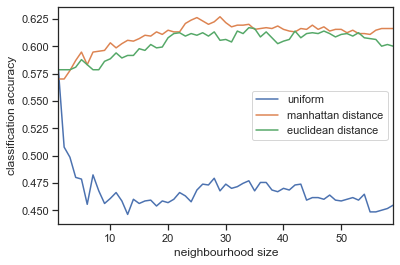

In [367]:
acc_pqn[1:].plot.line()
plt.xlabel('neighbourhood size')
plt.ylabel('classification accuracy')

In [211]:
#LDA with label quality
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

M = wine[D].values
n = np.ravel(wine[[L]])
ran = 42
M_train, M_test, n_train, n_test = train_test_split(M, n, test_size=0.2, random_state = ran) 

lda = LinearDiscriminantAnalysis().fit(M_train,n_train) 
M_trainLda = lda.transform(M_train)
M_testLda = lda.transform(M_test) 


n_neighborslist = list(range(1,60))
col_names=['uniform', 'manhattan distance','euclidean distance']
accarray = np.zeros((len(n_neighborslist),3))

acc_lqn=pd.DataFrame(accarray, columns=col_names)

for k in n_neighborslist:
    neigh = neighbors.KNeighborsClassifier(n_neighbors=k, weights='uniform')
    neigh.fit(M_trainLda, n_train)
    n_pred = neigh.predict(M_testLda)
    accscore = accuracy_score(n_test, n_pred)
    acc_lqn.at[k,col_names[0]] = accscore
    
for k in n_neighborslist:
    neigh_2 = neighbors.KNeighborsClassifier(n_neighbors=k, weights='distance', p=1)
    neigh_2.fit(M_trainLda, n_train)
    n_pred = neigh_2.predict(M_testLda)
    accscore = accuracy_score(n_test, n_pred)
    acc_lqn.at[k,col_names[1]] = accscore

for k in n_neighborslist:
    neigh_3 = neighbors.KNeighborsClassifier(n_neighbors=k, weights='distance', p=2)
    neigh_3.fit(M_trainLda, n_train)
    n_pred = neigh_3.predict(M_testLda)
    accscore = accuracy_score(n_test, n_pred)
    acc_lqn.at[k,col_names[2]] = accscore
    
acc_lqn.describe()

uniform  manhattan distance  euclidean distance
count  60.000000           60.000000           60.000000
mean    0.550590            0.662885            0.657859
std     0.073182            0.087785            0.086890
min     0.000000            0.000000            0.000000
25%     0.554423            0.670577            0.665385
50%     0.558462            0.676538            0.670000
75%     0.563077            0.681538            0.674615
max     0.636154            0.695385            0.685385

Text(0, 0.5, 'classification accuracy')

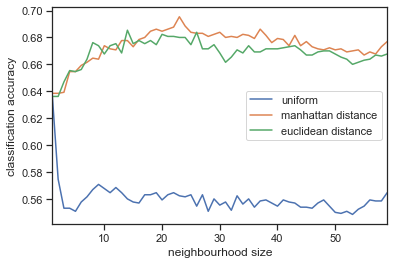

In [368]:
acc_lqn[1:].plot.line()
plt.xlabel('neighbourhood size')
plt.ylabel('classification accuracy')

## Analysis and Discussion

**1.k Plots: For each combination of weighting scheme, label (wine
colour, wine quality), and feature subset (all features, your sub-
set, first 5 principle components, LDA components) create a plot
of the classification accuracy vs. neighbourhood size as in
the Jupyter notebook example.**

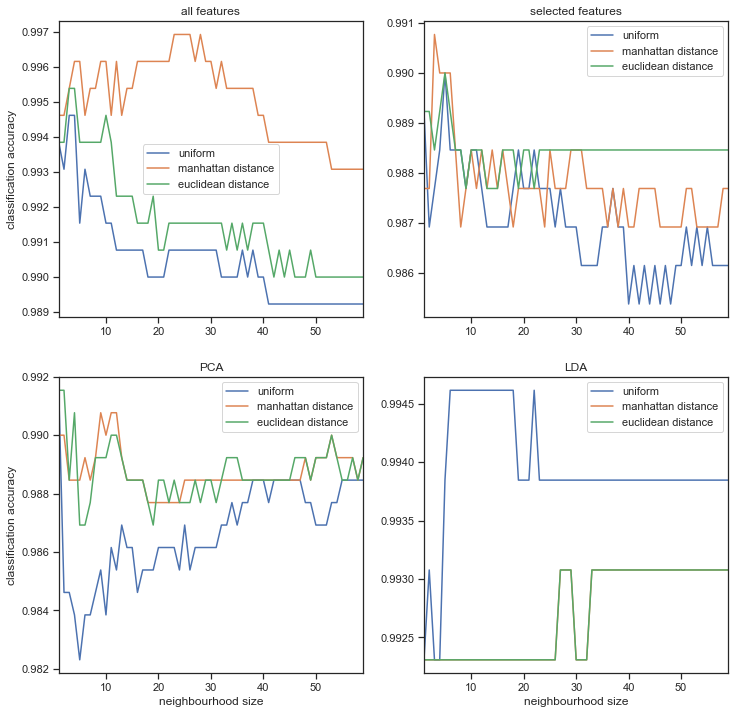

In [373]:
#With label color
import matplotlib.pyplot as plt

figure, axes = plt.subplots(2, 2,figsize=(12,12))
acc_ca[1:].plot.line(ax=axes[0,0], title='all features')
axes[0,0].set(ylabel='classification accuracy')
acc_sc[1:].plot.line(ax=axes[0,1], title='selected features')
acc_pc[1:].plot.line(ax=axes[1,0], title='PCA')
axes[1,0].set(xlabel='neighbourhood size', ylabel='classification accuracy')
acc_lc[1:].plot.line(ax=axes[1,1], title='LDA')
axes[1,1].set(xlabel='neighbourhood size')

plt.show()

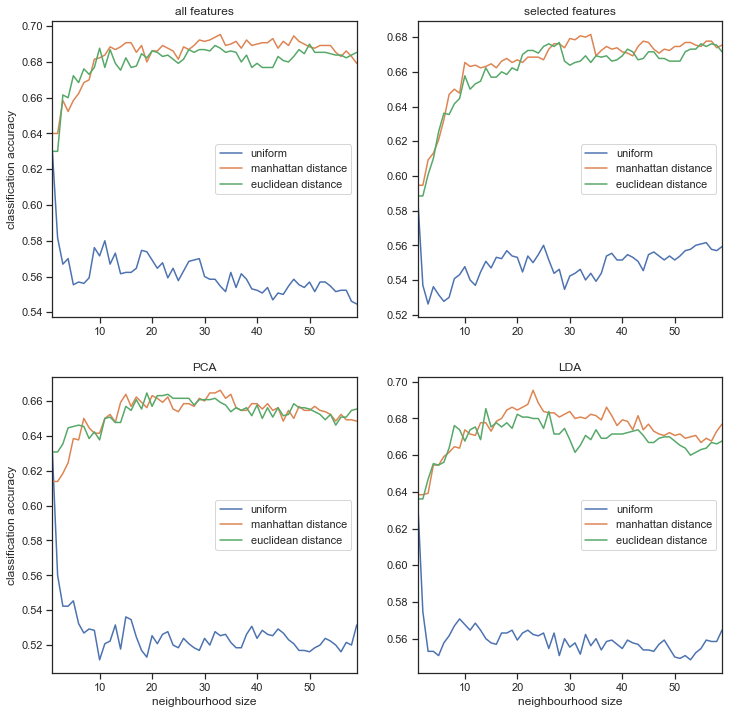

In [374]:
#With label quality
import matplotlib.pyplot as plt

figure, axes = plt.subplots(2, 2,figsize=(12,12))
acc_qa[1:].plot.line(ax=axes[0,0], title='all features')
axes[0,0].set(ylabel='classification accuracy')
acc_sq[1:].plot.line(ax=axes[0,1], title='selected features')
acc_pq[1:].plot.line(ax=axes[1,0], title='PCA')
axes[1,0].set(xlabel='neighbourhood size', ylabel='classification accuracy')
acc_lq[1:].plot.line(ax=axes[1,1], title='LDA')
axes[1,1].set(xlabel='neighbourhood size')

plt.show()

For each combination of weighting scheme, label (wine colour, wine quality), and feature subset (all features, your sub- set, first 5 principle components, LDA components),the plot of the classification accuracy vs. neighbourhood size are shown as above.

**2.Features:Some discussion on the relationship between the features from any analysis you performed.**

(11, -0.5)

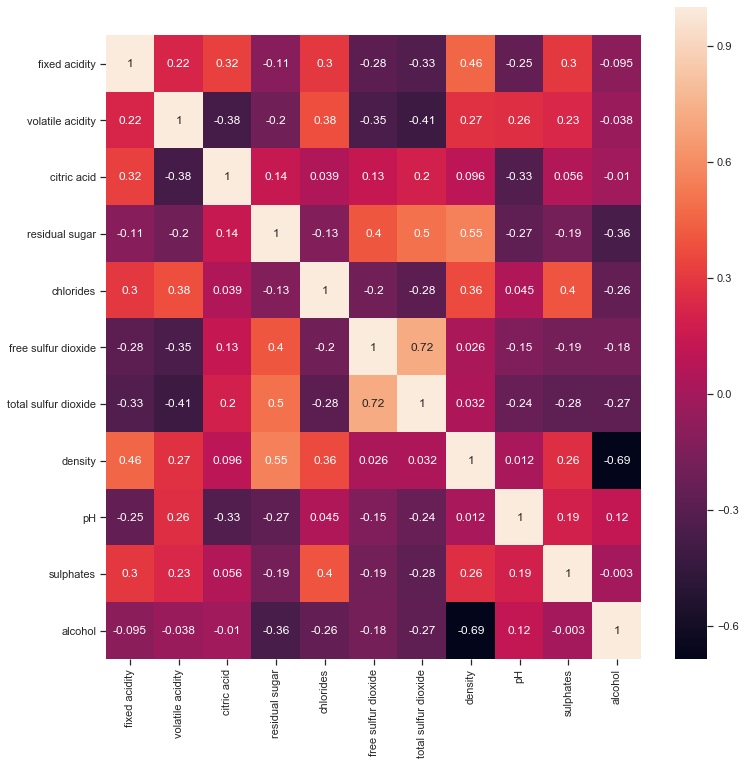

In [377]:
corr2 = wine[D].corr() 
figure, axes = plt.subplots(figsize=(12,12))
sns.heatmap(corr2, annot=True, fmt=".2g").set_ylim(11,-0.5)

According to the correlatioin matrix analysis, we can find that most of features are not highly correlated to each other with correlation coefficient less than 0.45 except density and alcohol. Alcohol and density has a highly negative correlation with coefficient of -0.69, this might influence the total accuracy of knn classification. But still including all features would have a higher accuracy since it would help explain more percentage of outcome variable.

**3.Selected Features: Were you able to find a subset of features that worked better than all features? How about compared to PCA or LDA?**

I could not find a subset of features that worked better than all features. From the plots above in problem 1, when usding label color, PCA and LDA helps to get better accuracy performance than using selected features subset. When using label quality, using selected features subset would get a better accuracy performance than using PCA, but LDA is still better method than both selectes features and PCA.

So we can conclude that the feature selection method would partly depend on the y--label.

**4.PCA vs. LDA:Did either of these methods help in this situation? Which worked better for the task? Did normalization impact the performance of either of them?**

Compared to using all features, PCA and LDA did not help to improve accuracy performance. For both label color and quality, LDA workded better that led to a higher total accuracy than PCA.

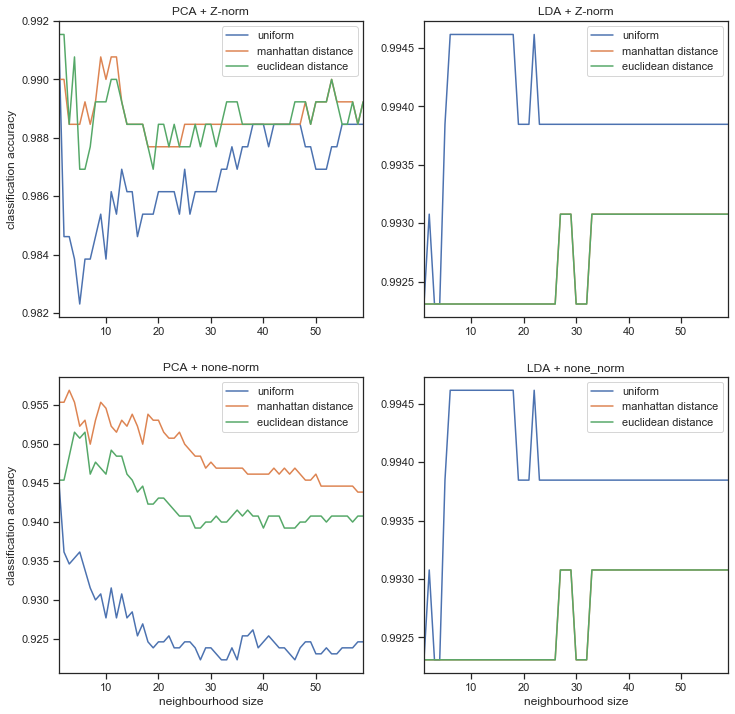

In [378]:
#With label color
import matplotlib.pyplot as plt

figure, axes = plt.subplots(2, 2,figsize=(12,12))
acc_pc[1:].plot.line(ax=axes[0,0], title='PCA + Z-norm')
axes[0,0].set(ylabel='classification accuracy')
acc_lc[1:].plot.line(ax=axes[0,1], title='LDA + Z-norm')
acc_pcn[1:].plot.line(ax=axes[1,0], title='PCA + none-norm')
axes[1,0].set(xlabel='neighbourhood size', ylabel='classification accuracy')
acc_lcn[1:].plot.line(ax=axes[1,1], title='LDA + none_norm')
axes[1,1].set(xlabel='neighbourhood size')

plt.show()

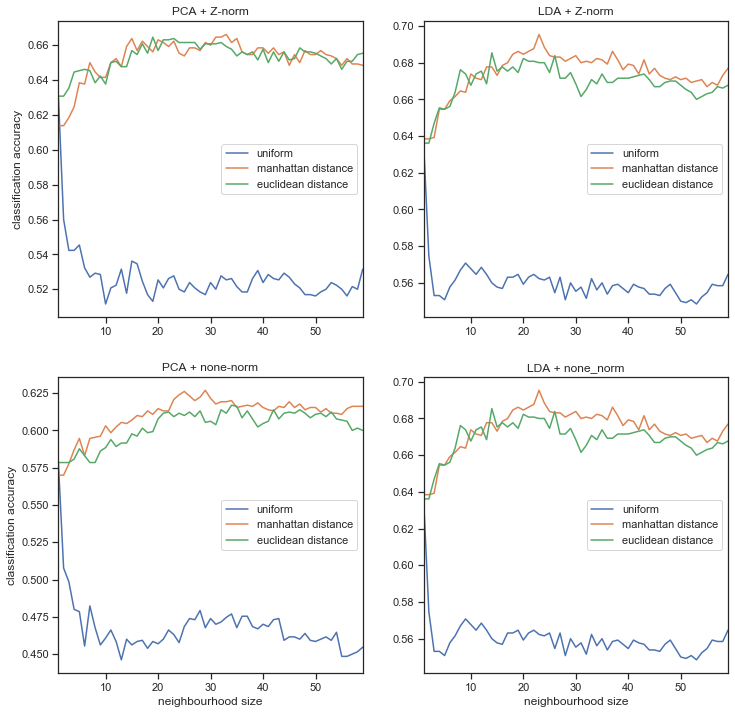

In [379]:
#With label quality
import matplotlib.pyplot as plt

figure, axes = plt.subplots(2, 2,figsize=(12,12))
acc_pq[1:].plot.line(ax=axes[0,0], title='PCA + Z-norm')
axes[0,0].set(ylabel='classification accuracy')
acc_lq[1:].plot.line(ax=axes[0,1], title='LDA + Z-norm')
acc_pqn[1:].plot.line(ax=axes[1,0], title='PCA + none-norm')
axes[1,0].set(xlabel='neighbourhood size', ylabel='classification accuracy')
acc_lqn[1:].plot.line(ax=axes[1,1], title='LDA + none_norm')
axes[1,1].set(xlabel='neighbourhood size')

plt.show()

From plots above we can conclude that normalization helps improved the accuracy performance when using PCA method, but it did not impact the performance of using LDA method. The accuracy plots using LDA before and after normaliztion remain the same.

**5.Plot:roject the data on the first two components for PCA and LDA and colour the points by the two labels ('quality','color') so four plots in total. How does this compare or inform your understanding of the data from the pairplots or other results?**

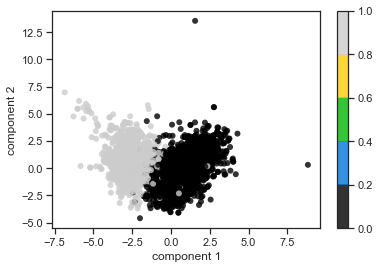

In [197]:
# PCA plot with label color
from sklearn.decomposition import PCA 
import matplotlib.pyplot as plt

X = wine_nd[D].values
y = np.ravel(wine[[C]])
ran = 42
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = ran) 

model = PCA(n_components=2) 
model.fit(X_train) 
X_2D = model.transform(X_train)

plt.scatter(X_2D[:, 0], X_2D[:, 1],
c=np.squeeze(y_train), edgecolor='none', alpha=0.8,
cmap=plt.cm.get_cmap('nipy_spectral',5))
plt.xlabel('component 1')
plt.ylabel('component 2')
plt.colorbar()

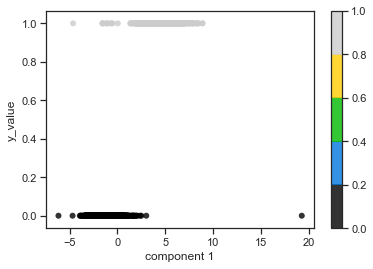

In [380]:
# LDA plot with label color
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
import matplotlib.pyplot as plt

X = wine_nd[D].values
y = np.ravel(wine[[C]])
ran = 42
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = ran) 

lda = LinearDiscriminantAnalysis().fit(X_train,y_train) 
X_trainLda = lda.transform(X_train)
X_testLda = lda.transform(X_test) 

plt.scatter(X_trainLda[:, 0],y_train,
c=np.squeeze(y_train), edgecolor='none', alpha=0.8,
cmap=plt.cm.get_cmap('nipy_spectral',5))
plt.xlabel('component 1')
plt.ylabel('color_value')
plt.colorbar()

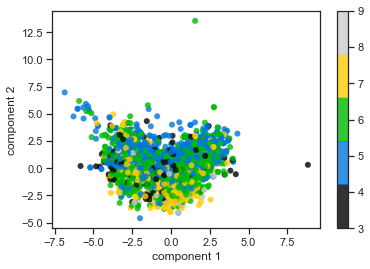

In [61]:
# PCA plot with label quality

from sklearn.decomposition import PCA 
import matplotlib.pyplot as plt

X = wine_nd[D].values
y = np.ravel(wine[[L]])
ran = 42
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = ran) 

model = PCA(n_components=2) 
model.fit(X_train) 
X_2D = model.transform(X_train)
plt.scatter(X_2D[:, 0], X_2D[:, 1],
c=np.squeeze(y_train), edgecolor='none', alpha=0.8,
cmap=plt.cm.get_cmap('nipy_spectral',5))
plt.xlabel('component 1')
plt.ylabel('component 2')
plt.colorbar()

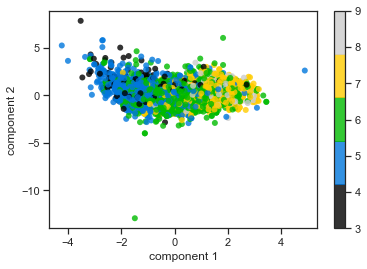

In [206]:
# LDA plot with label quality
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
import matplotlib.pyplot as plt

X = wine_nd[D].values
y = np.ravel(wine[[L]])
ran = 42
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = ran) 

lda = LinearDiscriminantAnalysis(n_components=2).fit(X_train,y_train) 
X_trainLda = lda.transform(X_train)
X_testLda = lda.transform(X_test) 

plt.scatter(X_trainLda[:, 0],X_trainLda[:, 1],
c=np.squeeze(y_train), edgecolor='none', alpha=0.8,
cmap=plt.cm.get_cmap('nipy_spectral',5))
plt.xlabel('component 1')
plt.ylabel('component 2')
plt.colorbar()

From sactter plots above, when using PCA for label color, in the two-dimensional representation, the same color value of the data points gather together. Most data points did not heavily overlap and mostly well separated. But when using LDA for label color, the data points would have more overlapping if scatter them without seperating  according to color-values. This means PCA helps to better seperate data points in different class, which is different than comparing knn accurayc plots of PCA and LDA.

For label quality, since it has seven classes, in the 2D representation of PCA and LDA, data points are heavily overlapping and not fairly well separated. It is hard to tell whether PCA or LDA is better if only using first two components. 

# Question 2

In [2]:
# Import the Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Import the Dataset B
import csv
data_B = pd.read_csv("DataB.csv")

Each file has 785 columns: 784 inputs (corresponding to a 28 x 28 gray-scale (0-255) image of the digit) and 1 response (handwritten digits of 0, 1, 2, 3, and 4 (5 classes).). Split both testing and training data into input matrix X (x_train) and response vector y (y_train) .

In [3]:
x_train = data_B.iloc[:,1:785]
x_train.shape

(2066, 784)

The data consists of 28x28 pixel images, which means that it is 784-dimensional.

In [4]:
y_train = data_B.iloc[:,785:786]
y_train.shape

(2066, 1)

**2.2 Principal Component Analysis (PCA)**

**2.2.1 Practical Questions**

1. In PCA, compute the eigenvectors and eigenvalues. Plot the scree plot and visually discuss which cut-off is good.

In [5]:
from sklearn import preprocessing
from sklearn.decomposition import PCA

x_trains = preprocessing.scale(x_train)

pca = PCA().fit(x_trains)
E_value= pca.explained_variance_
E_vector=pca.components_
print('Eigenvalues \n%s' % E_value)

Eigenvalues 
[5.17773194e+01 2.88008646e+01 2.67709105e+01 2.39303462e+01
 2.15750394e+01 1.58935251e+01 1.38619413e+01 1.19120888e+01
 1.06614183e+01 9.82358285e+00 9.11333621e+00 8.28795842e+00
 7.47022078e+00 7.18685689e+00 7.01821733e+00 6.72923900e+00
 6.17171361e+00 6.03035494e+00 5.97218819e+00 5.74588510e+00
 5.56641979e+00 5.34085526e+00 5.30999748e+00 5.07244463e+00
 4.90219996e+00 4.74032764e+00 4.46040954e+00 4.43875834e+00
 4.37522974e+00 4.24991493e+00 4.19736144e+00 4.13191195e+00
 4.00668370e+00 3.89959838e+00 3.82103747e+00 3.75801773e+00
 3.70087222e+00 3.57242695e+00 3.53870728e+00 3.47609288e+00
 3.37860197e+00 3.27713810e+00 3.19615121e+00 3.18762080e+00
 3.09982645e+00 3.00645131e+00 2.95668338e+00 2.93613238e+00
 2.84667418e+00 2.80490440e+00 2.77752432e+00 2.73566237e+00
 2.73062118e+00 2.64033670e+00 2.60241921e+00 2.56556417e+00
 2.48286895e+00 2.46546582e+00 2.43864084e+00 2.41046503e+00
 2.38602670e+00 2.34433526e+00 2.31096266e+00 2.25866184e+00
 2.23001715

In [6]:
print('Eigenvectors \n%s' % E_vector)

Eigenvectors 
[[ 0.00197863  0.00151307 -0.00049178 ... -0.0001125  -0.00132315
   0.00591181]
 [-0.00493308  0.00640373  0.00156563 ... -0.00300533 -0.00947149
  -0.00287621]
 [-0.00037529  0.00258725 -0.00372451 ... -0.00335936  0.00553066
   0.00624184]
 ...
 [-0.00294198 -0.00188671 -0.00838343 ... -0.00055758 -0.00186681
  -0.0001313 ]
 [ 0.00069225 -0.0040447  -0.00090736 ...  0.00319481  0.00012294
   0.00054035]
 [ 0.00178531  0.00479506 -0.00816424 ... -0.00498406 -0.00351318
   0.00323845]]


Text(0.5, 1.0, 'PCA Scree Plot')

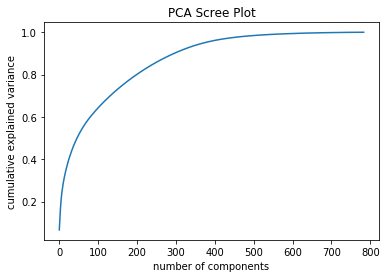

In [6]:
#scree plot
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.title('PCA Scree Plot')

From the scree plot above, it quantifies how much of the total, 784-dimensional variance is contained within the first N components. We can see that with the digits the first 300 components contain approximately 90% of the variance, while you need around 500 components to describe close to 100% of the variance. So it would be good enough to cut off at around 300 components.

2. Using subplot in python matplotlib, plot the scatter plot of the projected data with the top 20 eigenvalues (although PCA does not use labels but use colors and legend to show the class instances). Is there a clear point where you could cut off the dimensions? Compare your analysis with the analysis from previous section.

In [7]:
#projected data with the top 20 eigenvalues
pca = PCA(n_components=20).fit(x_trains)
x_train20 = pca.transform(x_trains)
x_train20.shape

(2066, 20)

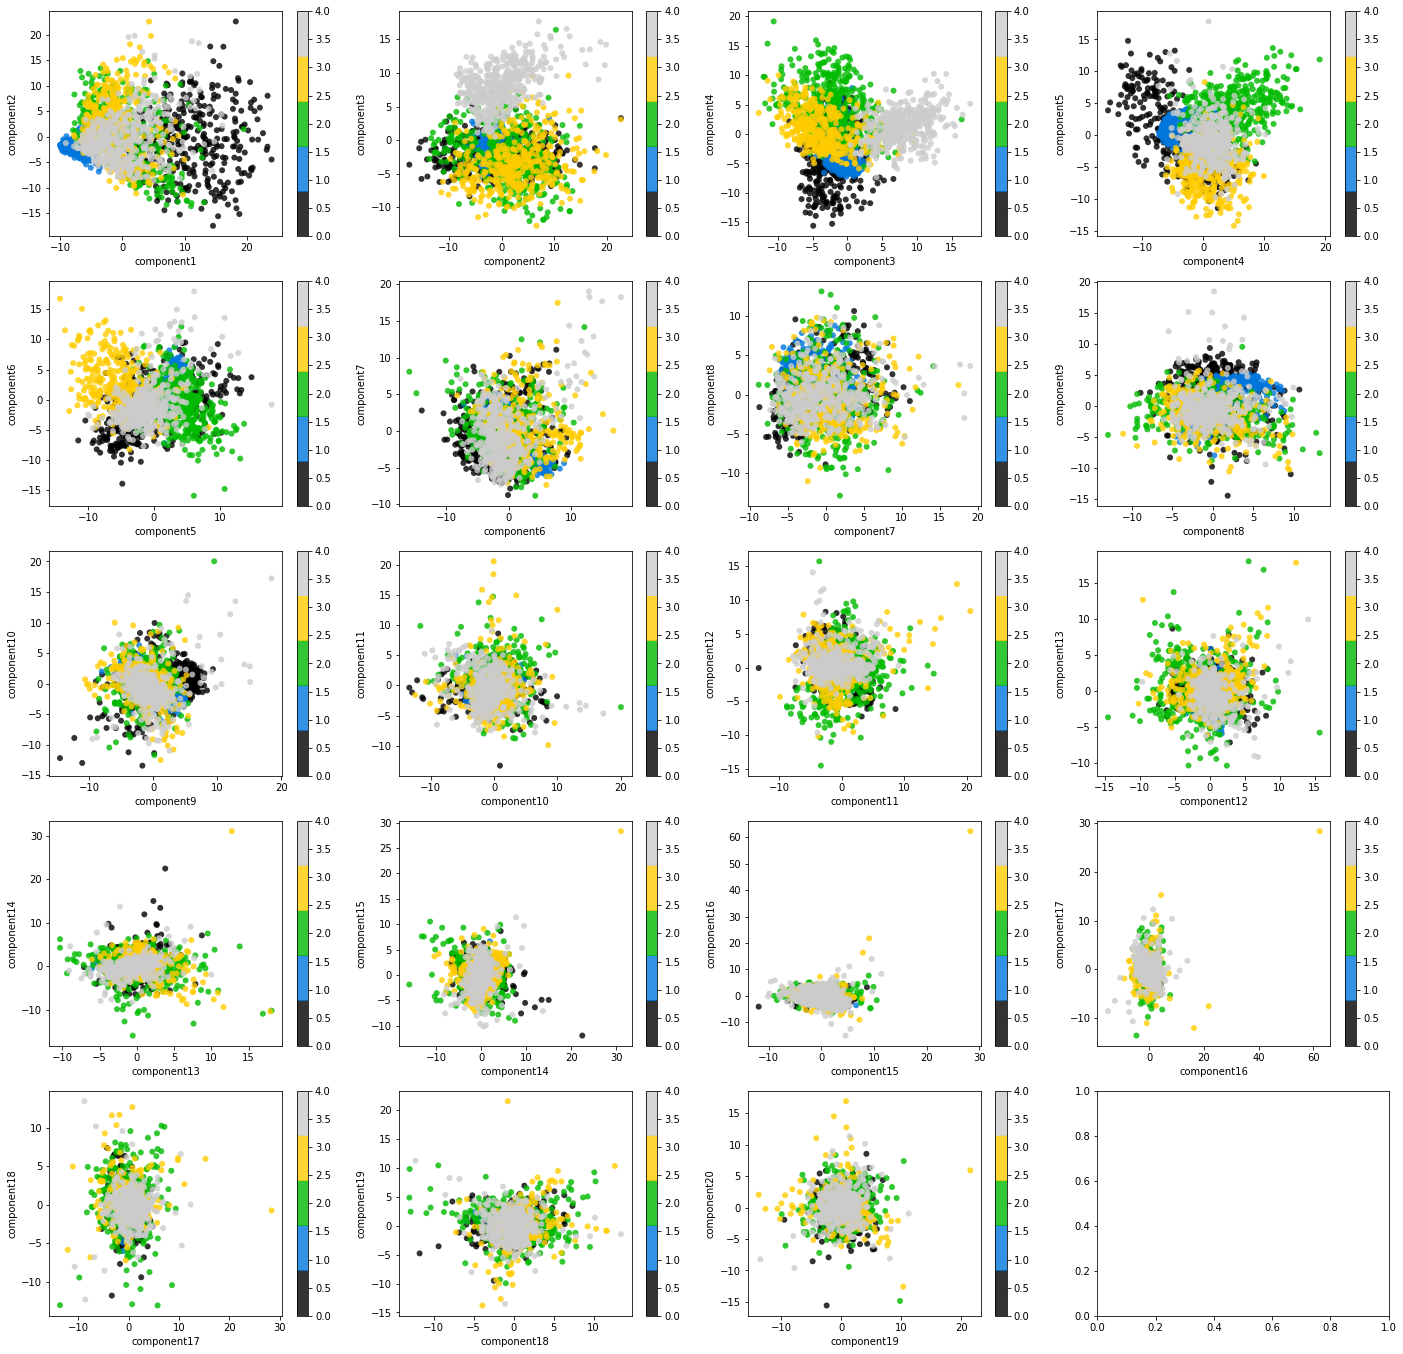

In [9]:
import matplotlib.pyplot as plt
import numpy as np

figure, axes = plt.subplots(5, 4,figsize=(24,24))
for k in range(1, 20):
    plt.subplot(5, 4, k)
    plt.scatter(x_train20[:, k-1],x_train20[:, k],
    c=np.squeeze(y_train), edgecolor='none', alpha=0.8,
    cmap=plt.cm.get_cmap('nipy_spectral',5))
    strx=str(k)
    stry=str(k+1)
    plt.xlabel('component'+strx)
    plt.ylabel('component'+stry)
    plt.colorbar()

From 79 subplots above, we can find that in most plots all data points in different classes are heavily overlapping and not separated. But in the second and third plots that are using principal component_3, there is a relatively clear point that could seperate most data points in class 4 from other classes when component_3 = 5. 

Compared to the results in last section, PCA could help to seperate between two color classes in scatter plot, but for quality label all data points are overlapping heavily using first two components. So from this question we can inspired that if using third or other components, it might offer a more clear point to differentiate classes. So when projecting data with multi dimensions, we need to check more top components scatter plots that could visually help find proper principal component to cut off the dimensions and differentiate classes when deducting dimensions.

3. Plot two 2-dimensional representations of the data points based on the first vs second principal components and 5th vs 6th displaying the data points of each class with a different color (you will need to project the data). Explain the results versus the known classes and compare between the two plots.

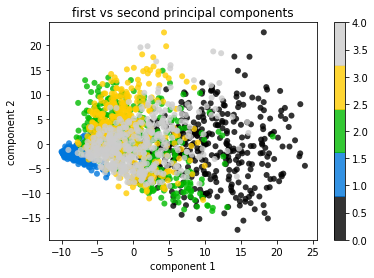

In [84]:
# first vs second principal components
plt.scatter(x_train20[:, 0], x_train20[:, 1],
c=np.squeeze(y_train), edgecolor='none', alpha=0.8,
cmap=plt.cm.get_cmap('nipy_spectral',5))
plt.xlabel('component 1')
plt.ylabel('component 2')
plt.title('first vs second principal components')
plt.colorbar()

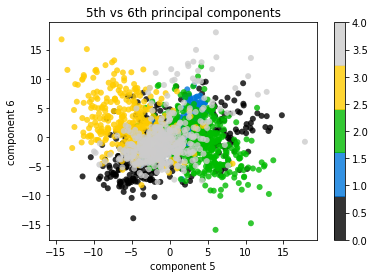

In [85]:
#5th vs 6th principal components
plt.scatter(x_train20[:, 4], x_train20[:, 5],
c=np.squeeze(y_train), edgecolor='none', alpha=0.8,
cmap=plt.cm.get_cmap('nipy_spectral',5))
plt.xlabel('component 5')
plt.ylabel('component 6')
plt.title('5th vs 6th principal components')
plt.colorbar()

In the first plot based on the first vs second principal components, most data points in class 1,2,3 and 4 are heavily overlapping while data points in class 0 are partially seperated from other classes and seperated within the class.

In the second plot based on 5th vs 6th principal components, data points in all class 1 and2 are heavily overlapping and data points in all class 2,3 and 4 is partially seperated between each other. All data points in same class are gathering together except class 0 which is also relatively seperated within class than data points in other classes.

Comparing two plots, similarly class 0 data points are relatively seperated within class in both plots. While in first plot most data points in class 1,2,3 and 4 are heavily overlapping, in second plot data points in all class 2,3 and 4 is partially seperated between each other. First plot might help to seperate class 0 data points, while second plot might help to seperate class 2,3 and 4 data points.

4. Implement (1) PCA and (2) dual PCA with singular value decomposition. [Note: No libraries for PCA, dual PCA or SVD should be used for this question. In PCA and dual PCA, only left and right matrices of singular vector are used. So, use the relationship of SVD and eigenvalue decomposition to find the left and right singular vectors and the singular values. And then, use them in PCA and dual PCA.] Save the time of computations and compare the times. Analyze your comparison.

In [8]:
# PCA
X=x_train.T
X

0     1     2     3     4     5     6     7     8     9     ...  \
fea.1       4     5     1     5     3     0     1     3     5     5  ...   
fea.2       4     1     3     3     5     0     3     3     0     5  ...   
fea.3       3     4     0     2     3     1     3     0     3     4  ...   
fea.4       0     3     3     3     3     5     5     5     3     5  ...   
fea.5       0     1     1     5     0     0     3     2     1     3  ...   
...       ...   ...   ...   ...   ...   ...   ...   ...   ...   ...  ...   
fea.780     2     1     2     4     1     1     5     2     2     0  ...   
fea.781     1     3     2     4     2     1     2     4     3     3  ...   
fea.782     1     3     1     2     4     1     4     2     5     1  ...   
fea.783     4     5     2     4     1     1     0     1     1     4  ...   
fea.784     5     4     4     4     1     1     1     5     2     1  ...   

         2056  2057  2058  2059  2060  2061  2062  2063  2064  2065  
fea.1       2     2     3     4     4     4     2     2     5     3  
fea.2       4     4     3     2     2     0     2     3     2     3  
fea.3       5     4     4     2     4     3     3     2     4     1  
fea.4       4     4     0     5     0     0     4     3     3     3  
fea.5       1     1     3     1     1     4     2     1     1     2  
...       ...   ...   ...   ...   ...   ...   ...   ...   ...   ...  
fea.780     3     4     4     5     4     4     4     5     4     4  
fea.781     3     2     1     4     3     2     0     2     2     5  
fea.782     4     4     4     2     4     2     2     1     4     1  
fea.783     4     3     3     3     2     2     3     1     3     3  
fea.784     1     3     4     3     5     2     2     3     4     1  

[784 rows x 2066 columns]

In [9]:
import numpy as np
import time
# PCA
X=x_train.T
meanVals = np.mean(X, axis = 1)
avgs = np.tile(meanVals, (2066,1))
X_meanRemoved = X - avgs.T
XXT=np.dot(X_meanRemoved,X_meanRemoved.T)
S2,U=np.linalg.eig(XXT)#According to SVD, U is the left singular vectors and square root of S2 is the singular values.U.shape

start = time.process_time()
#Encode training data
Y=np.dot(U.T,X_meanRemoved)
#Reconstruct training data
X_recon=np.dot(U, Y)
t_pca=time.process_time()-start

t_pca

0.375

In [68]:
U.shape

(784, 784)

In [64]:
#Dual PCA
XTX=np.dot(X_meanRemoved.T,X_meanRemoved)
S2,V=np.linalg.eig(XTX)#According to SVD, V is the right singular vectors and square root of S2 is the singular values.U.shape
sortindex=np.argsort(S2)
sortindex = sortindex[:-(784+1):-1]
S2_d= S2[sortindex]
S_d= np.sqrt(S2_d)
V_t=V[:,sortindex]
S_diag=np.diag(S_d)

start_d = time.process_time()
#Encode training data
Y_d=np.dot(S_diag,V_t.T)
#Reconstruct training data
VVT=np.dot(V_t,V_t.T)
X_recon_d=np.dot(X_meanRemoved, VVT)
t_dualpca=time.process_time()-start_d

t_dualpca

2.8125

In [72]:
V_t.shape

(2066, 784)

For data_B, PCA computation time is much shorter than dual PCA computation time. This is reasonable that the sample size t=2066 is much larger than sample dimensions d=784. When using PCA algorithm, the computation is mainly based on the left singular vectors of SVD formula that is U(784x784); while using Dual PCA algorithm, the computation is mainly based on the right singular vectors -V(2066x2066) of SVD formula and choosing top d dimensions for computation that is V(2066x784). 

So generally, we need to choose between PCA and dual PCA algorithms according to number of dimensions and sample size. If sample size is larger than number of dimensions , PCA would have less computation and save time; but if number of dimensions is larger than sample size, dual PCA would help reduce computation time.

**2.3 Fisher Discriminant Analysis (FDA)**<br/>
As discussed in the class, Fisher Discriminant Analysis (FDA) and Linear Discriminant Analysis (LDA) are equivalent.<br/><br/>
**2.3.1 Practical Questions**<br/>
1. As the class labels are already known, you can use the FDA or LDA to reduce the dimensionality. Using any implementation of FDA or LDA you wish, and subplot in python matplotlib, plot the scatter plot of the projected data with the top 20 eigenvalues (use colors and legends for classes). Explain the results obtained in terms of the known classes. Which LDA directions separate which classes better (which LDA directions are responsible for separating which classes)?

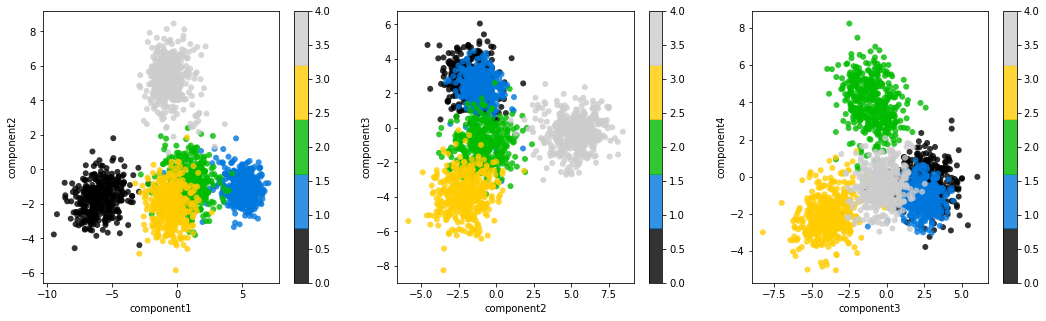

In [153]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
import matplotlib.pyplot as plt
y_train=np.ravel(y_train)
lda = LinearDiscriminantAnalysis(n_components=4).fit(x_train,y_train) 
X_trainLda = lda.transform(x_train)

figure, axes = plt.subplots(1, 3,figsize=(18,5))
for k in range(1, 4):
    plt.subplot(1, 3, k)
    plt.scatter(X_trainLda[:, k-1],X_trainLda[:, k],
    c=np.squeeze(y_train), edgecolor='none', alpha=0.8,
    cmap=plt.cm.get_cmap('nipy_spectral',5))
    strx=str(k)
    stry=str(k+1)
    plt.xlabel('component'+strx)
    plt.ylabel('component'+stry)
    plt.colorbar()

From three scatter plots above, we can see that data points in same class all are all gathering together. 
In the first plot, data points in class 0,1,4 are well seperated while class 2 and 3 data points are partially overlapping. 
In the second plot, data points in class 2,3 and 4 are mostly seperated while class 0 and 1 data points are heavily overlapping. 
In the third plot, similarly data points in class 2,3 and 4 are mostly seperated while class 0 and 1 data points are heavily overlapping.

In conclusion, LDA component 1 could well seperate class 0 and 1 ; LDA component 2 could seperate class 4 nearly 99%; LDA component 3 could seperate class 3 beetter and component 4 could seperate class 2 better.

2. Compare the results of the LDA with the results obtained by using PCA.

Compared to PCA results, data points in different classes are much more seperated in LDA plots and data points in same classes are all gathering together. Most data points in PCA plots are overlapping and it is hard to find one direction that could mostly seperate data points in one class to other classes. Every LDA component in this dataset could at least seperate one class out of all calsses, while PCA could not help.

# Question 3: Nonlinear Dimensionality Reduction

In [75]:
# Import the Libraries
import pandas as pd
import matplotlib.pyplot as plt

# Import the Dataset B
import csv
data_B = pd.read_csv("DataB.csv")
x = data_B.iloc[:,1:785]
y = data_B.iloc[:,785:786]
x.shape

(2066, 784)

**3.2 Practical Questions**<br/>
1. Apply the following methods on the dataset (use the default sklearn parameters except for n components and kernel. Use n components=2 for all because of 2D visualization. For kernel PCA, use RBF kernel.):<br/>
   • kernel PCA<br/>
   • Isomap<br/>
   • Locally Linear Embedding (LLE)<br/>
   • Laplacian Eigenmap (sklearn.manifold.SpectralEmbedding)<br/>
   • t-SNE<br/>
   Save the embeddings for the next part.

In [76]:
#Kernel PCA
from sklearn.decomposition import KernelPCA

start1 = time.process_time()
kpca = KernelPCA(n_components=2, kernel='rbf')
X_kpca = kpca.fit_transform(x)
t_kpca=time.process_time()-start1
t_kpca

2.421875

In [77]:
#Isomap
from sklearn.manifold import Isomap

start2 = time.process_time()
Iso_embedding = Isomap(n_components=2)
X_Iso = Iso_embedding.fit_transform(x)
t_Iso=time.process_time()-start2
t_Iso

8.609375

In [78]:
# Locally Linear Embedding (LLE)
from sklearn.manifold import LocallyLinearEmbedding

start3 = time.process_time()
LLE_embedding = LocallyLinearEmbedding(n_components=2)
X_LLE = LLE_embedding.fit_transform(x)
t_LLE=time.process_time()-start3
t_LLE

7.796875

In [79]:
#Laplacian Eigenmap
from sklearn.manifold import SpectralEmbedding

start4 = time.process_time()
LE_embedding = SpectralEmbedding(n_components=2)
X_LE = LE_embedding.fit_transform(x)
t_LE=time.process_time()-start4
t_LE

10.53125

In [80]:
#t-SNE
from sklearn.manifold import TSNE

start5 = time.process_time()
TSNE = TSNE(n_components=2)
X_TSNE = TSNE.fit_transform(x)
t_TSNE=time.process_time()-start5
t_TSNE

21.625

2. Plot the scatter plot of the embeddings. Compare the embeddings of the different above methods. Completely analyze your comparisons including questions suchg as : Which methods do better on which parts of the data? Give at least three clear performance differences between a pair of methods that you can explain based on the nature of methods and the data. What tradeoffs might need to be considered in order to decide which method is 'best' to use for this dataset?

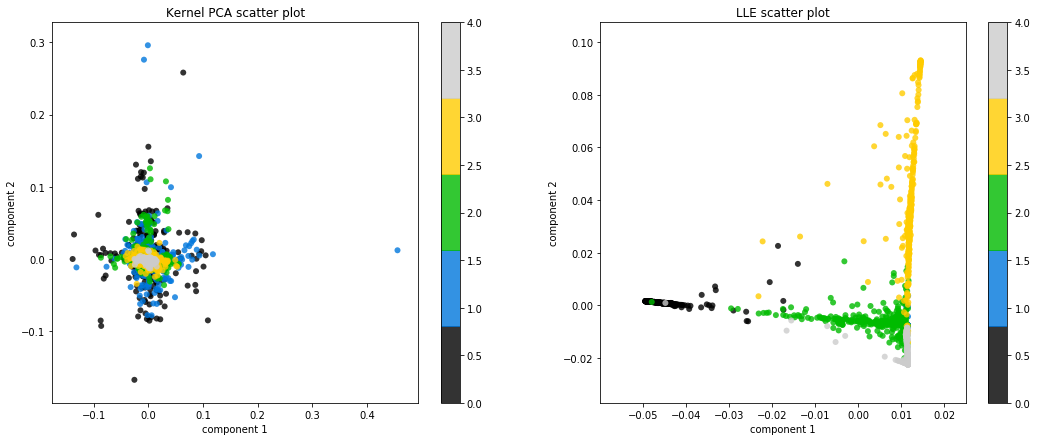

In [81]:
figure, axes = plt.subplots(1, 2,figsize=(18,7))

plt.subplot(1, 2, 1)
plt.scatter(X_kpca[:, 0], X_kpca[:, 1],
c=np.squeeze(y), edgecolor='none', alpha=0.8,
cmap=plt.cm.get_cmap('nipy_spectral',5))
plt.xlabel('component 1')
plt.ylabel('component 2')
plt.title('Kernel PCA scatter plot')
plt.colorbar()

plt.subplot(1, 2, 2)
plt.scatter(X_LLE[:, 0], X_LLE[:, 1],
c=np.squeeze(y), edgecolor='none', alpha=0.8,
cmap=plt.cm.get_cmap('nipy_spectral',5))
plt.xlabel('component 1')
plt.ylabel('component 2')
plt.title('LLE scatter plot')
plt.colorbar()

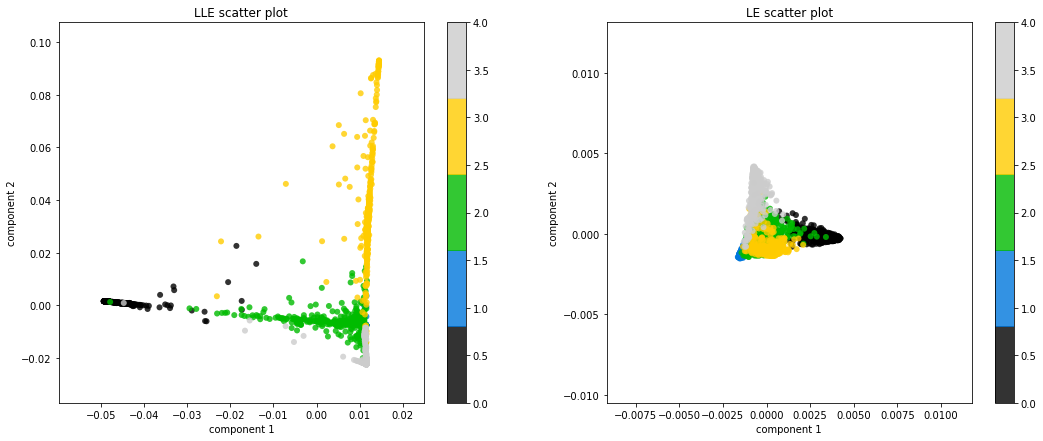

In [82]:
figure, axes = plt.subplots(1, 2,figsize=(18,7))

plt.subplot(1, 2, 1)
plt.scatter(X_LLE[:, 0], X_LLE[:, 1],
c=np.squeeze(y), edgecolor='none', alpha=0.8,
cmap=plt.cm.get_cmap('nipy_spectral',5))
plt.xlabel('component 1')
plt.ylabel('component 2')
plt.title('LLE scatter plot')
plt.colorbar()

plt.subplot(1, 2, 2)
plt.scatter(X_LE[:, 0], X_LE[:, 1],
c=np.squeeze(y), edgecolor='none', alpha=0.8,
cmap=plt.cm.get_cmap('nipy_spectral',5))
plt.xlabel('component 1')
plt.ylabel('component 2')
plt.title('LE scatter plot')
plt.colorbar()

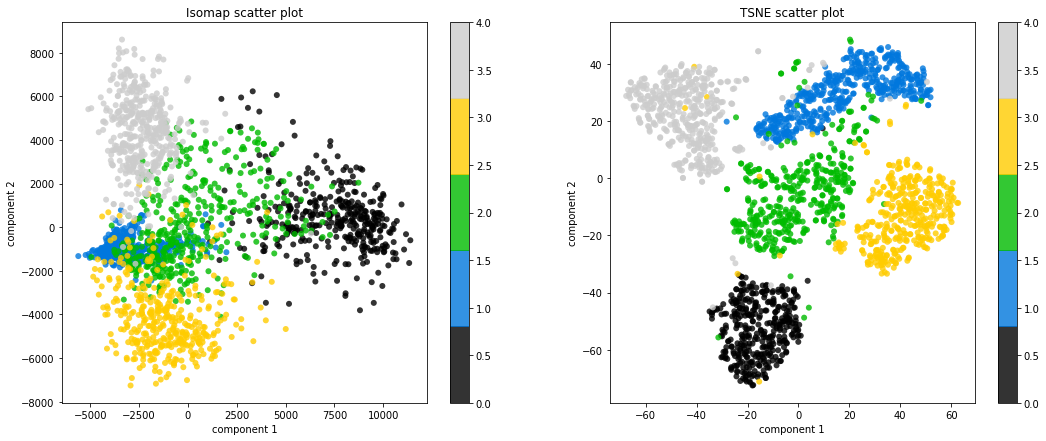

In [83]:
figure, axes = plt.subplots(1, 2,figsize=(18,7))

plt.subplot(1, 2, 1)
plt.scatter(X_Iso[:, 0], X_Iso[:, 1],
c=np.squeeze(y), edgecolor='none', alpha=0.8,
cmap=plt.cm.get_cmap('nipy_spectral',5))
plt.xlabel('component 1')
plt.ylabel('component 2')
plt.title('Isomap scatter plot')
plt.colorbar()

plt.subplot(1, 2, 2)
plt.scatter(X_TSNE[:, 0], X_TSNE[:, 1],
c=np.squeeze(y), edgecolor='none', alpha=0.8,
cmap=plt.cm.get_cmap('nipy_spectral',5))
plt.xlabel('component 1')
plt.ylabel('component 2')
plt.title('TSNE scatter plot')
plt.colorbar()

From scatter plots above, we can see that in kernel PCA embedding different classes of data points still overlapping heavily and class 0 and 1 data points are more seperated within the class. In LLE embedding, it seperates data points in class 0,2 and 3; class 4 data points  are mostly overlapping with class 2 and class 1 data points are almost perfectly overlapping with class 2 so that we nearly could not see any blue points in the plot. For LE embedding, all the data points are overlapping and gathering closely so it is hard to seperate any class from the scatter plot. 

In Isomap embedding, data points of class 0 ,1,3 and 4 are relatively seperrated and data points in the same class are gathering toward same spot although they are not gathering closely. Data points of class 2 are heavily overlapping with calss 1 and scattered in a big range. So Isomap embedding could help to seperate data points of class 0, 3 and 4.

In t-SNE embedding,data points are well seperated between classes and gathering closely within the class. It could clearly seperate every class of data points.

Firstly, comparing kernel PCA embedding and LLE embedding, in kernel PCA embedding different classes of data points still overlapping heavily while in LLE embedding two classes of data points are well seperated between class and gathering closely within class. This could be explained that in kernel PCA method it is trying to maximize covariance between data points regardless of known classes in a lower dimensional space, while LLE method is using neighbouring points to to map the high-dimensional data points to the single global coordinate system with weights and relationships between neighbouring points are preserved. So in the LLE plot, data points in the same class are gathering closely and different classses are much more seperated than PCA plot.

Then, comparing LLE and LE,LLE embedding well seperated 2 classes of data points but in LE embedding  all data points heavily overlapping. LE method is closely related to LLE approach, also based on neighbouring points it is instead constructing a weighted graph with t nodes and a set of edges that are connecting neighbouring points. This might explained the performance difference that linear weights mapping is more suitable for this dataset than graph mapping that is trying to minimize difference of neighbouring points with weights in the single global coordinate system. 

Thirdly, Comparing Isomap and t-SNE, form plots above we can find that these two had much better performance to seperate data points in different classes. And t-SNE had better performance than Isomap according to scatter plots. In Isomap method, it is based on MDS using geodesic rather than straight line distances to find a low-dimensional mapping that preserves these pairwise distances. But in t-SNE method, it transforms the distance relationship into a conditional probability to represent similarity. If the conditional probability between one point and all other points is considered, a conditional probability distribution Pi can be formed. T-SNE required more computation between all data points than Isomap and it would be more accurate to seperate points in different classes. 

In conclusion, t-SNE embedding had the best performance in seperating data points in different classes but the main tradeoff that need to consider is that the computation time(around 22 seconds) of t-SNE method is more than two times compared to other methods. But for this dataset, t-SNE had obviously better performance than others.